In [1]:
import math
import matplotlib.patches as pchs
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def openFiles(path):
    
    frames = []
    times = []
    groups = []
    
    for files in os.scandir(path):
        
        data = open(files, 'r')
        blanks = 0
        
        fileFs = []
        fileTs = []
        fileGs = []
        
        for line in data.readlines():
            
            iData = line.split()
            value = iData[0]
            valueWorks = True
            
            try:
                float(value)
            except:
                valueWorks = False
            
            if valueWorks == True:
                
                if blanks == 1:
                    fileTs.append(float(value))
                    #fileTs.append(float(value)/60)
                
                elif blanks == 2:
                    fileGs.append(int(value))
            
            else:
                blanks += 1
        
        for i in range(len(fileTs)):
            fileFs.append(int(i))
        
        frames.append(fileFs)
        times.append(fileTs)
        groups.append(fileGs)
    
    return(frames, times, groups)




def cutDataFs(frames, times, groups, minN):
    
    longest = [None]*minN
    
    for i in range(len(frames)):
        
        placed = False
        
        for j in range(len(longest)):
            if (longest[j] == None or len(frames[i]) > len(frames[longest[j]])) and placed == False:
                longest.insert(j,i)
                longest.pop(minN)
                placed = True
    
    lengths = []
    for i in range(len(longest)):
        lengths.append(frames[longest[i]][len(frames[longest[i]])-1])
    
    maxF = len(frames[longest[minN-1]])
    
    newFs = []
    newTs = []
    newGs = []
    
    for i in range(len(frames)):
        
        if i in longest:
            
            Fs = []
            Ts = []
            Gs = []
            
            for j in range(maxF):
                Fs.append(frames[i][j])
                Ts.append(times[i][j])
                Gs.append(groups[i][j])
            
            newFs.append(Fs)
            newTs.append(Ts)
            newGs.append(Gs)
        
        else:
            newFs.append(frames[i])
            newTs.append(times[i])
            newGs.append(groups[i])
    
    return(newFs, newTs, newGs)




def cutDataTs(frames, times, groups, minN):
    
    longest = [None]*minN
    
    for i in range(len(times)):
        
        placed = False
        
        for j in range(len(longest)):
            if (longest[j] == None or times[i][len(times[i])-1] > times[longest[j]][len(times[longest[j]])-1]) and placed == False:
                longest.insert(j,i)
                longest.pop(minN)
                placed = True
    
    lengths = []
    for i in range(len(longest)):
        lengths.append(times[longest[i]][len(times[longest[i]])-1])
    
    maxT = times[longest[minN-1]][len(times[longest[minN-1]])-1]
    
    newFs = []
    newTs = []
    newGs = []
    
    for i in range(len(times)):
        
        if i in longest:
            
            Fs = []
            Ts = []
            Gs = []
            
            for j in range(len(times[i])):
                if times[i][j] <= maxT:
                    Fs.append(frames[i][j])
                    Ts.append(times[i][j])
                    Gs.append(groups[i][j])
            
            newFs.append(Fs)
            newTs.append(Ts)
            newGs.append(Gs)
        
        else:
            newFs.append(frames[i])
            newTs.append(times[i])
            newGs.append(groups[i])
    
    return(newFs, newTs, newGs)




def frameData(frames, groups):
    
    fFrames = []
    fStubNum = []
    fGroups = []
    fGroupsFs = []
    fGroupsFsPlot = [[],[],[]]
    fAvgGroups = []
    
    maxF = 0
    
    for i in range(len(frames)):
        if int(round(np.amax(frames[i]))) > maxF:
            maxF = int(round(np.amax(frames[i])))
    
    for i in range(maxF+1):
        fFrames.append(i)
        fGroups.append([0]*3)
    
    for i in range(len(frames)):
        for j in range(len(frames[i])):
            
            frame = int(round(frames[i][j]))
            fGroups[frame][groups[i][j]-1] += 1
    
    for i in range(len(fGroups)):
        
        groupsI = fGroups[i]
        stubNumI = np.sum(groupsI)
        groupsFsI = []
        totalGsI = 0
        
        for j in range(3):
            totalGsI += (j+1)*groupsI[j]
            groupsFsI.append(groupsI[j]/stubNumI)
            fGroupsFsPlot[j].append(1-np.sum(groupsFsI))
        
        fStubNum.append(stubNumI)
        fGroupsFs.append(groupsFsI)
        fAvgGroups.append(totalGsI/stubNumI)
    
    return(fFrames, fStubNum, fGroups, fGroupsFs, fGroupsFsPlot, fAvgGroups)




def timeData(times, groups):
    
    tTimes = []
    tStubNum = []
    tGroups = []
    tGroupsFs = []
    tGroupsFsPlot = [[],[],[]]
    tAvgGroups = []
    
    newGs = []
    
    for i in range(len(times)):
        
        newGroups = []
        newGs.append([])
        
        for j in range(round(times[i][len(times[i])-1]/3.5)+1):
            newGroups.append([])
        
        for j in range(len(times[i])):
            newGroups[int(round(times[i][j]/3.5))].append(groups[i][j])
        
        for j in range(len(newGroups)):
            
            if len(newGroups[j]) == 0:
                newGs[i].append(int(round((np.mean(newGroups[j-1])+np.mean(newGroups[j+1]))/2)))
            
            else:
                newGs[i].append(int(round(np.mean(newGroups[j]))))
    
    maxT = 0
    
    for i in range(len(times)):
        if times[i][len(times[i])-1] > maxT:
            maxT = times[i][len(times[i])-1]
    
    maxI = int(round(maxT/3.5)+1)
    
    for i in range(maxI):
        tTimes.append(3.5*i/60)
        tGroups.append([0]*3)
        
    for i in range(len(newGs)):
        for j in range(len(newGs[i])):
            tGroups[j][newGs[i][j]-1] += 1
    
    for i in range(len(tGroups)):
        
        groupsI = tGroups[i]
        stubNumI = np.sum(groupsI)
        groupsFsI = []
        totalGsI = 0
        
        for j in range(3):
            totalGsI += (j+1)*groupsI[j]
            groupsFsI.append(groupsI[j]/stubNumI)
            tGroupsFsPlot[j].append(2-np.sum(groupsFsI))
        
        tStubNum.append(stubNumI)
        tGroupsFs.append(groupsFsI)
        tAvgGroups.append(totalGsI/stubNumI)
    
    return(tTimes, tStubNum, tGroups, tGroupsFs, tGroupsFsPlot, tAvgGroups)

In [31]:
print('WT')

WTframes, WTtimes, WTgroups = openFiles(path = r'E:\KFiberSplaying\AblationExperiments\JupyterOutput\Paper\SplayGroups\Control\Final')

WTframesF5, WTtimesF5, WTgroupsF5 = cutDataFs(WTframes, WTtimes, WTgroups, 5)
WTframesF10, WTtimesF10, WTgroupsF10 = cutDataFs(WTframes, WTtimes, WTgroups, 10)

WTframesT5, WTtimesT5, WTgroupsT5 = cutDataTs(WTframes, WTtimes, WTgroups, 5)
WTframesT10, WTtimesT10, WTgroupsT10 = cutDataTs(WTframes, WTtimes, WTgroups, 10)

fWTframes, fWTstubs, fWTgroups, fWTgroupsFs, fWTgroupsFsPlot, fWTavgGs = frameData(WTframes, WTgroups)
fWTframesF5, fWTstubsF5, fWTgroupsF5, fWTgroupsFsF5, fWTgroupsFsPlotF5, fWTavgGsF5 = frameData(WTframesF5, WTgroupsF5)
fWTframesF10, fWTstubsF10, fWTgroupsF10, fWTgroupsFsF10, fWTgroupsFsPlotF10, fWTavgGsF10 = frameData(WTframesF10, WTgroupsF10)

tWTtimes, tWTstubs, tWTgroups, tWTgroupsFs, tWTgroupsFsPlot, tWTavgGs = timeData(WTtimes, WTgroups)
tWTtimesT5, tWTstubsT5, tWTgroupsT5, tWTgroupsFsT5, tWTgroupsFsPlotT5, tWTavgGsT5 = timeData(WTtimesT5, WTgroupsT5)
tWTtimesT10, tWTstubsT10, tWTgroupsT10, tWTgroupsFsT10, tWTgroupsFsPlotT10, tWTavgGsT10 = timeData(WTtimesT10, WTgroupsT10)

WTgroups3 = []
WTgroups2 = []
WTgroups1 = []
for i in range(len(tWTgroupsFs)):
    WTgroups3.append(tWTgroupsFs[i][2])
    WTgroups2.append(tWTgroupsFs[i][2]+tWTgroupsFs[i][1])
    WTgroups1.append(1)



print('NuMA')

NuMAframes, NuMAtimes, NuMAgroups = openFiles(path = r'E:\KFiberSplaying\AblationExperiments\JupyterOutput\Paper\SplayGroups\NuMA\NuMA-siRNA\Final')

NuMAframesF5, NuMAtimesF5, NuMAgroupsF5 = cutDataFs(NuMAframes, NuMAtimes, NuMAgroups, 5)
NuMAframesF10, NuMAtimesF10, NuMAgroupsF10 = cutDataFs(NuMAframes, NuMAtimes, NuMAgroups, 10)

NuMAframesT5, NuMAtimesT5, NuMAgroupsT5 = cutDataTs(NuMAframes, NuMAtimes, NuMAgroups, 5)
NuMAframesT10, NuMAtimesT10, NuMAgroupsT10 = cutDataTs(NuMAframes, NuMAtimes, NuMAgroups, 10)

fNuMAframes, fNuMAstubs, fNuMAgroups, fNuMAgroupsFs, fNuMAgroupsFsPlot, fNuMAavgGs = frameData(NuMAframes, NuMAgroups)
fNuMAframesF5, fNuMAstubsF5, fNuMAgroupsF5, fNuMAgroupsFsF5, fNuMAgroupsFsPlotF5, fNuMAavgGsF5 = frameData(NuMAframesF5, NuMAgroupsF5)
fNuMAframesF10, fNuMAstubsF10, fNuMAgroupsF10, fNuMAgroupsFsF10, fNuMAgroupsFsPlotF10, fNuMAavgGsF10 = frameData(NuMAframesF10, NuMAgroupsF10)

tNuMAtimes, tNuMAstubs, tNuMAgroups, tNuMAgroupsFs, tNuMAgroupsFsPlot, tNuMAavgGs = timeData(NuMAtimes, NuMAgroups)
tNuMAtimesT5, tNuMAstubsT5, tNuMAgroupsT5, tNuMAgroupsFsT5, tNuMAgroupsFsPlotT5, tNuMAavgGsT5 = timeData(NuMAtimesT5, NuMAgroupsT5)
tNuMAtimesT10, tNuMAstubsT10, tNuMAgroupsT10, tNuMAgroupsFsT10, tNuMAgroupsFsPlotT10, tNuMAavgGsT10 = timeData(NuMAtimesT10, NuMAgroupsT10)

NuMAgroups3 = []
NuMAgroups2 = []
NuMAgroups1 = []
for i in range(len(tNuMAgroupsFs)):
    NuMAgroups3.append(tNuMAgroupsFs[i][2])
    NuMAgroups2.append(tNuMAgroupsFs[i][2]+tNuMAgroupsFs[i][1])
    NuMAgroups1.append(1)



colorsWT = ['blue', 'lightskyblue', 'lightgray']
colorsNuMA = ['red', 'pink', 'lightgray']

WT
NuMA


77
30


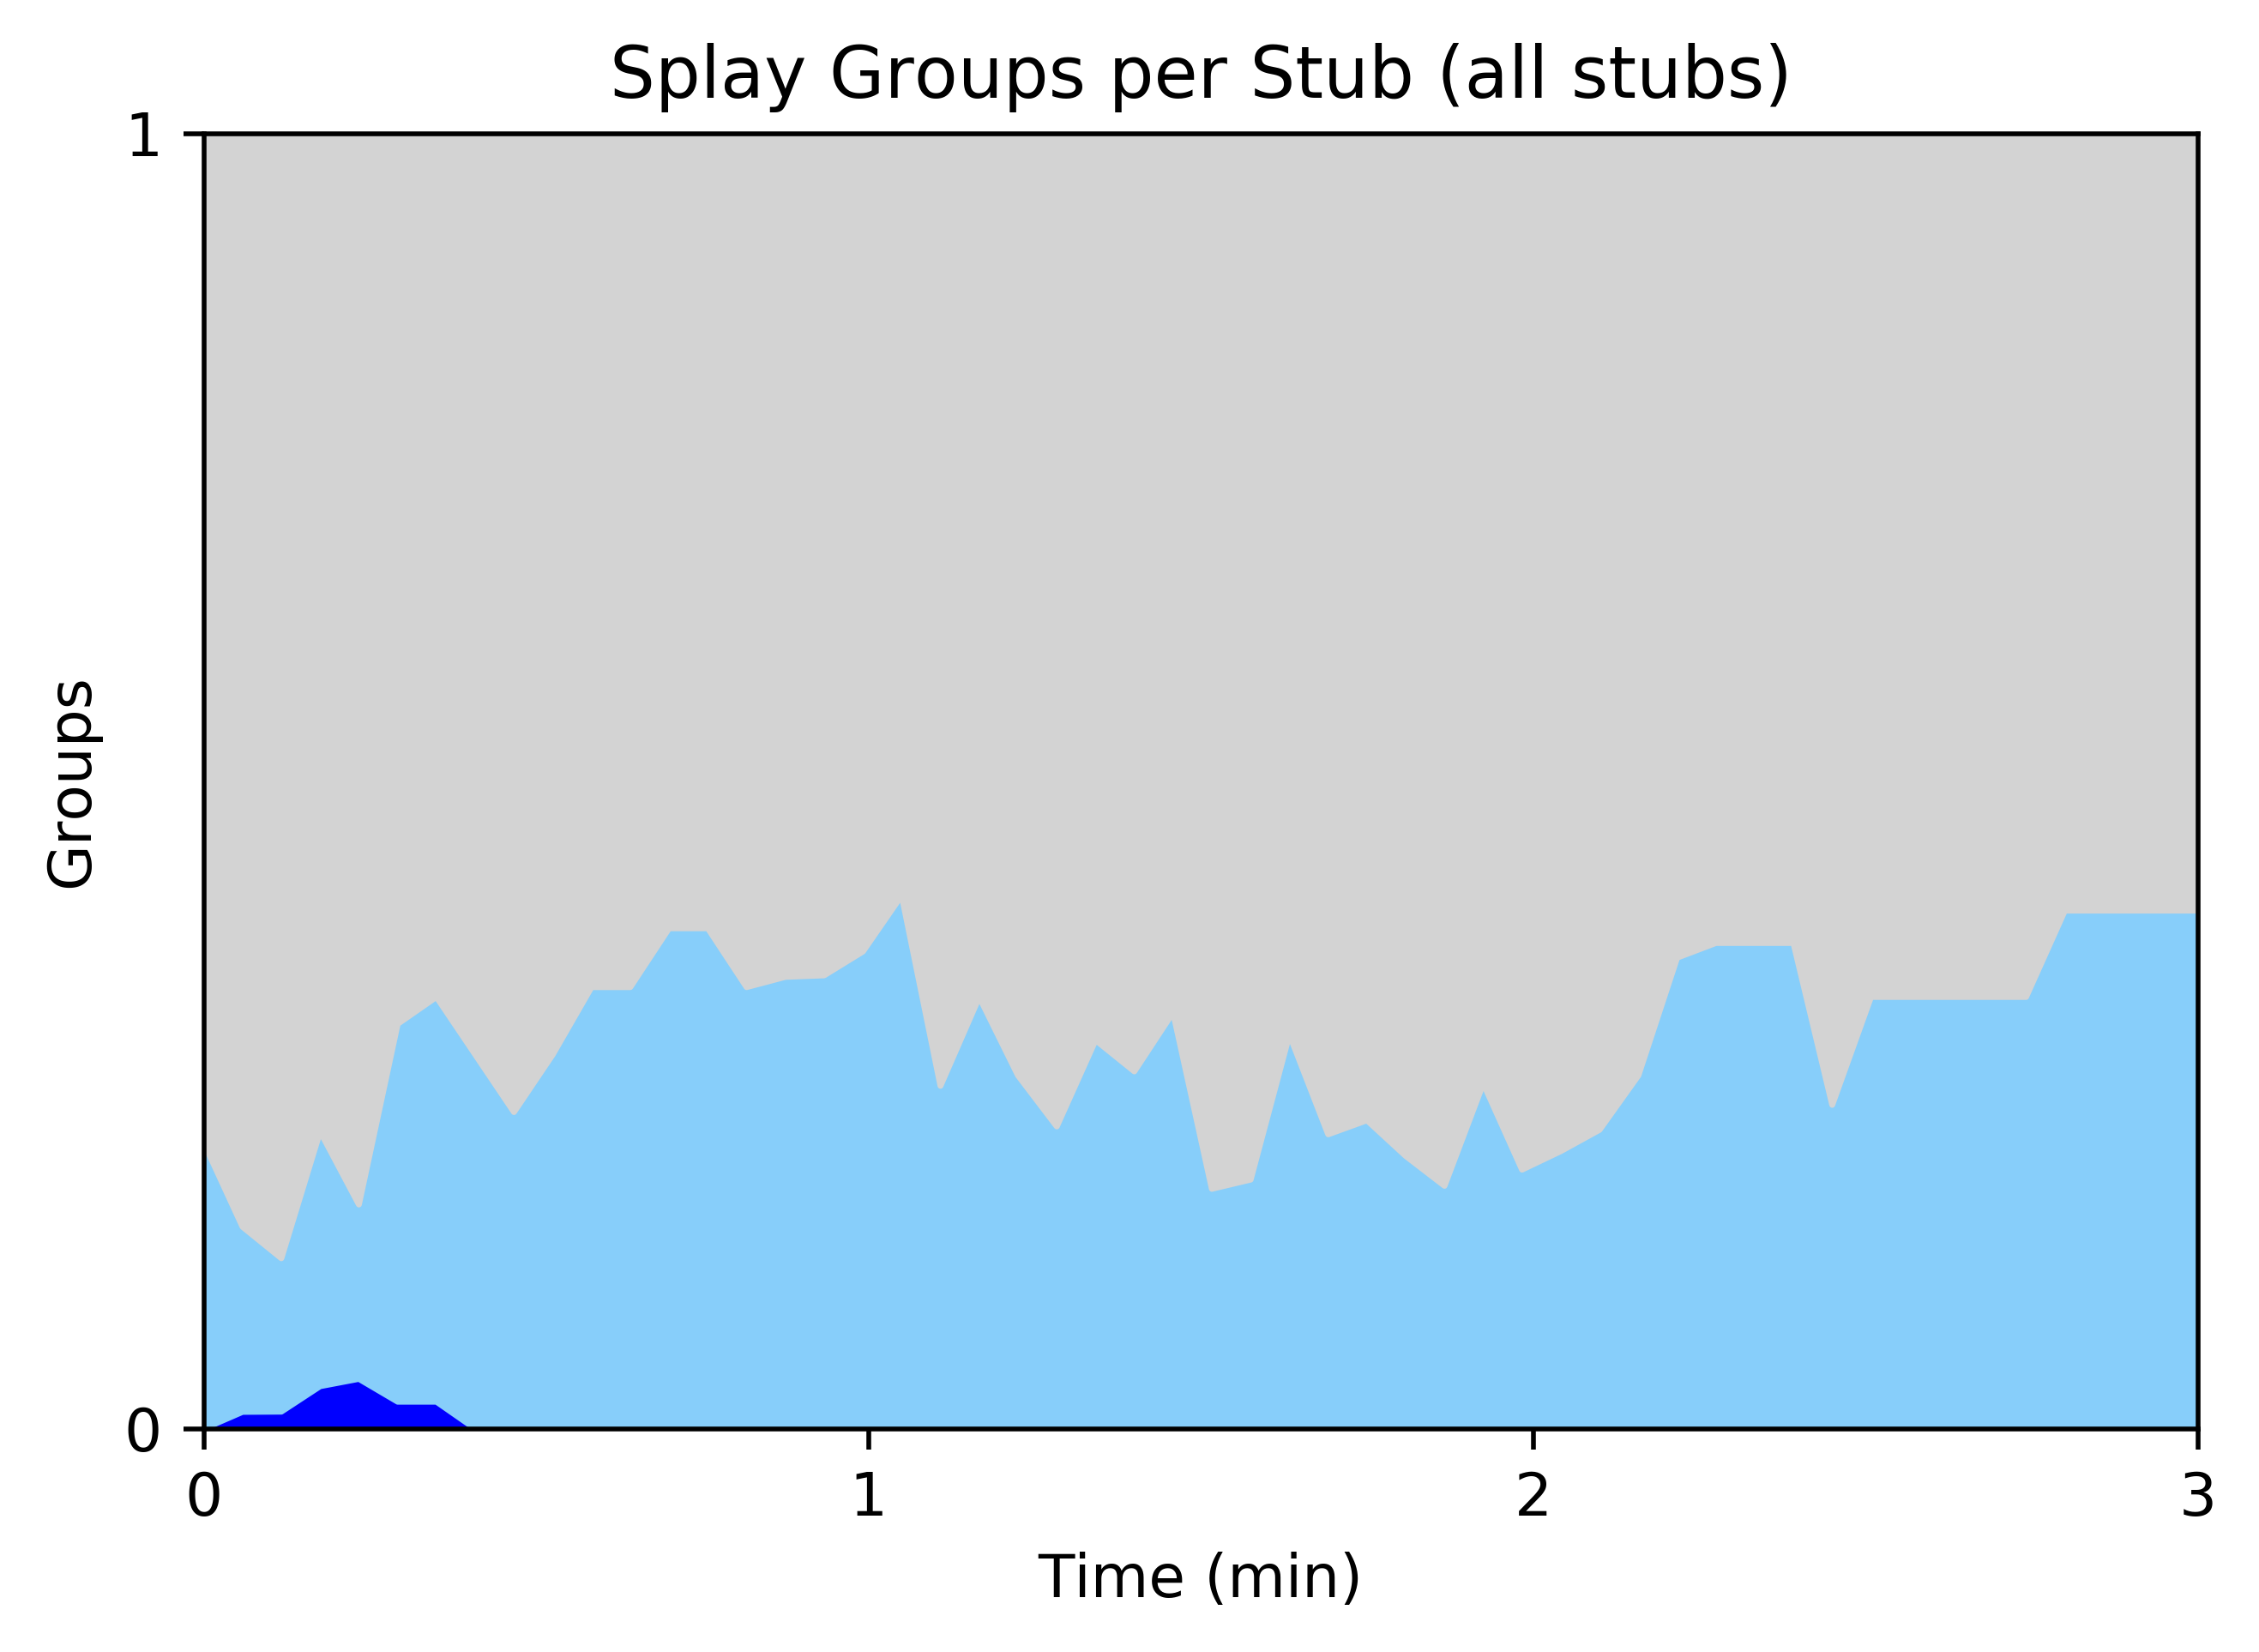

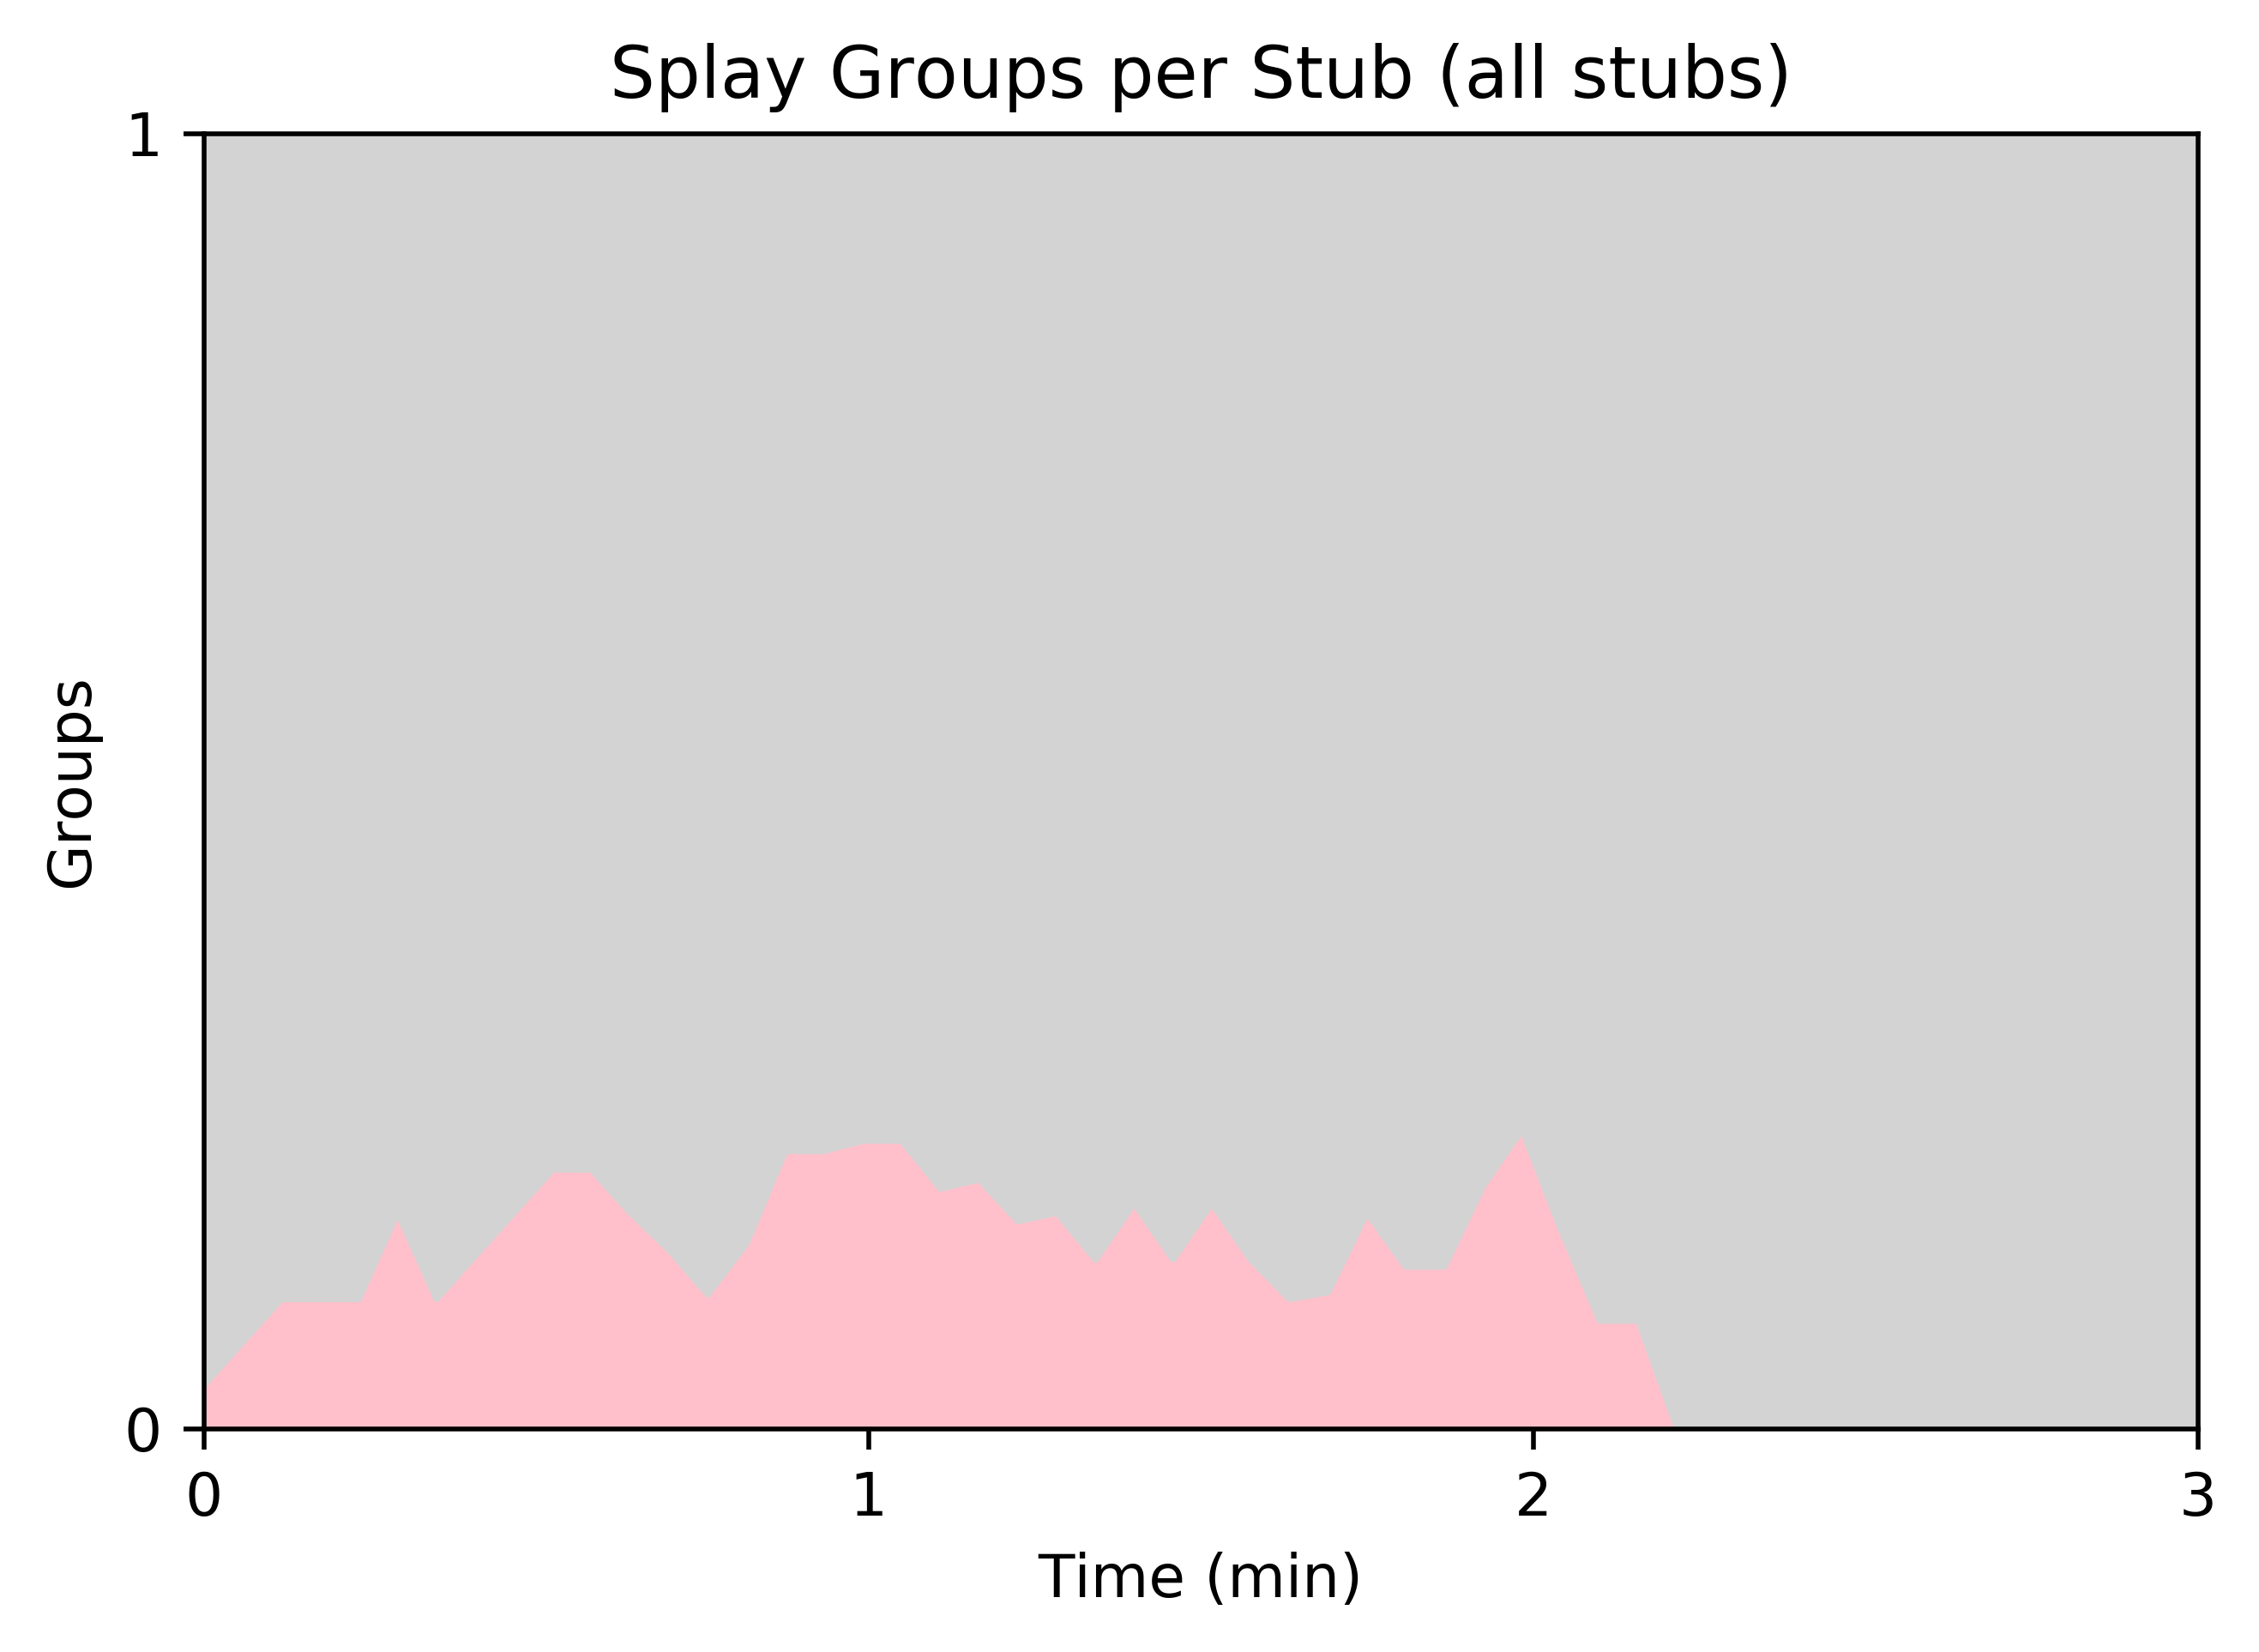

In [33]:
plt.figure(dpi=500)
plt.fill_between(tWTtimes, 0, WTgroups3, color=colorsWT[0])
plt.fill_between(tWTtimes, WTgroups3, WTgroups2, color=colorsWT[1])
plt.fill_between(tWTtimes, WTgroups2, 1, color='lightgray')
plt.xlim(0,3)
plt.xticks([0,1,2,3])
plt.ylim(0,1)
plt.yticks([0,1])
plt.title('Splay Groups per Stub (all stubs)')
plt.xlabel('Time (min)', size=10)
plt.ylabel('Groups', size=10)
plt.savefig('2D-WT.eps', format='eps', dpi=1000)
print(len(WTgroups))

plt.figure(dpi=500)
plt.fill_between(tNuMAtimes, 0, NuMAgroups3, color=colorsNuMA[0])
plt.fill_between(tNuMAtimes, NuMAgroups3, NuMAgroups2, color=colorsNuMA[1])
plt.fill_between(tNuMAtimes, NuMAgroups2, 1, color='lightgray')
plt.xlim(0,3)
plt.xticks([0,1,2,3])
plt.ylim(0,1)
plt.yticks([0,1])
plt.title('Splay Groups per Stub (all stubs)')
plt.xlabel('Time (min)', size=10)
plt.ylabel('Groups', size=10)
plt.savefig('2D-NuMA.eps', format='eps', dpi=1000)
print(len(NuMAgroups))

([<matplotlib.axis.YTick at 0x195621b9f60>,
 <a list of 2 Text yticklabel objects>)

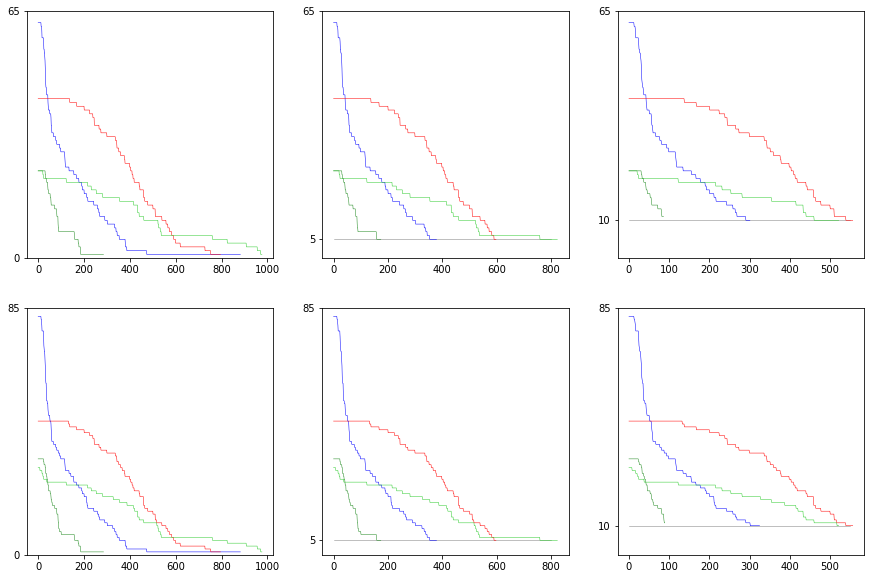

In [20]:
fig = plt.figure(figsize=[15,10])

fig.add_subplot(2,3,1)
for i in range(4):
    plt.plot(fFrames[i], fStubs[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,65)
plt.yticks([0,65])

fig.add_subplot(2,3,2)
plt.plot([0,800], [5,5], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(fFramesF5[i], fStubsF5[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,65)
plt.yticks([5,65])

fig.add_subplot(2,3,3)
plt.plot([0,550], [10,10], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(fFramesF10[i], fStubsF10[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,65)
plt.yticks([10,65])

fig.add_subplot(2,3,4)
for i in range(4):
    plt.plot(fFramesALL[i], fStubsALL[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,85)
plt.yticks([0,85])

fig.add_subplot(2,3,5)
plt.plot([0,800], [5,5], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(fFramesALLF5[i], fStubsALLF5[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,85)
plt.yticks([5,85])

fig.add_subplot(2,3,6)
plt.plot([0,550], [10,10], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(fFramesALLF10[i], fStubsALLF10[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,85)
plt.yticks([10,85])

([<matplotlib.axis.YTick at 0x1955e539438>,
 <a list of 2 Text yticklabel objects>)

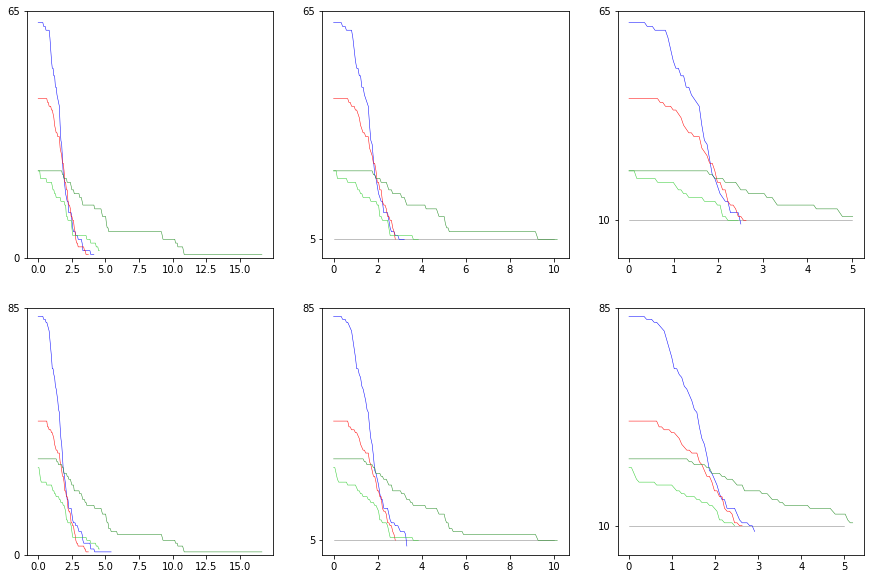

In [21]:
fig = plt.figure(figsize=[15,10])

fig.add_subplot(2,3,1)
for i in range(4):
    plt.plot(tTimes[i], tStubs[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,65)
plt.yticks([0,65])

fig.add_subplot(2,3,2)
plt.plot([0,10], [5,5], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(tTimesT5[i], tStubsT5[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,65)
plt.yticks([5,65])

fig.add_subplot(2,3,3)
plt.plot([0,5], [10,10], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(tTimesT10[i], tStubsT10[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,65)
plt.yticks([10,65])

fig.add_subplot(2,3,4)
for i in range(4):
    plt.plot(tTimesALL[i], tStubsALL[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,85)
plt.yticks([0,85])

fig.add_subplot(2,3,5)
plt.plot([0,10], [5,5], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(tTimesALLT5[i], tStubsALLT5[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,85)
plt.yticks([5,85])

fig.add_subplot(2,3,6)
plt.plot([0,5], [10,10], c='gray', linewidth=0.5)
for i in range(4):
    plt.plot(tTimesALLT10[i], tStubsALLT10[i], c=colors3[i], linewidth=0.5)
plt.ylim(0,85)
plt.yticks([10,85])

Text(0, 0.5, 'Groups')

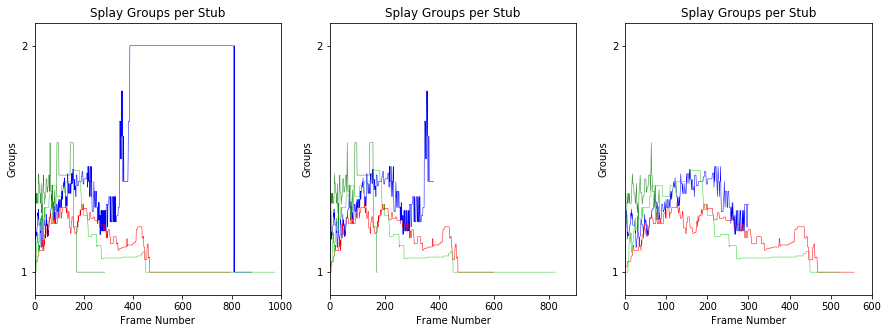

In [6]:
fig = plt.figure(figsize=[15,5])

fig.add_subplot(1,3,1)
for i in range(4):
    plt.plot(fFrames[i], fAvgGs[i], c=colors3[i], linewidth=0.5)
plt.xlim(0,1000)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Frame Number')
plt.ylabel('Groups')

fig.add_subplot(1,3,2)
for i in range(4):
    plt.plot(fFramesF5[i], fAvgGsF5[i], c=colors3[i], linewidth=0.5)
plt.xlim(0,900)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Frame Number')
plt.ylabel('Groups')

fig.add_subplot(1,3,3)
for i in range(4):
    plt.plot(fFramesF10[i], fAvgGsF10[i], c=colors3[i], linewidth=0.5)
plt.xlim(0,600)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Frame Number')
plt.ylabel('Groups')

Text(0.5, 0.98, 'Splay Groups per Stub')

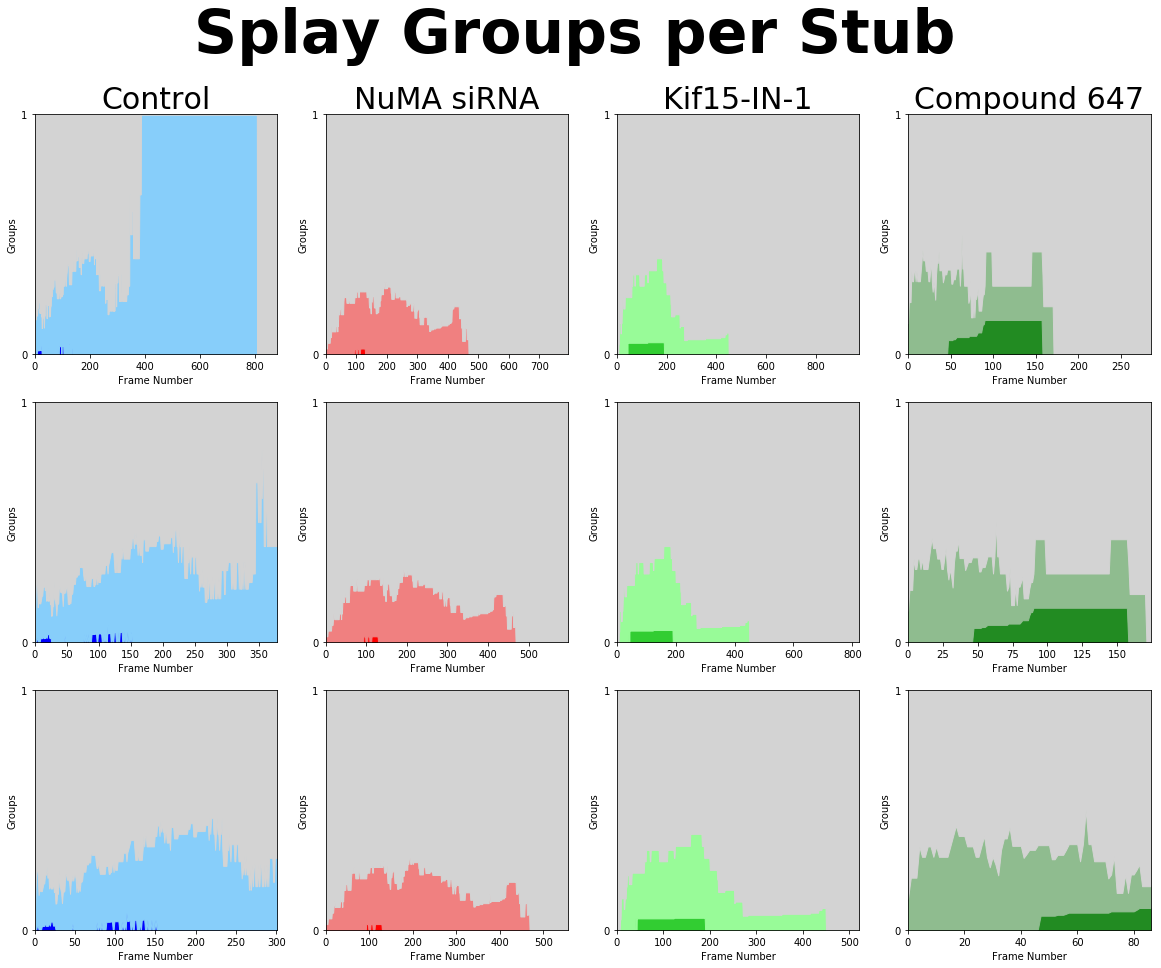

In [7]:
fig = plt.figure(figsize=[20,15])


for i in range(4):
    
    fig.add_subplot(3,4,i+1)
    
    plt.fill_between(fFrames[i], 0, fGroupsFsPlot[i][1], color=colors3[i])
    plt.fill_between(fFrames[i], fGroupsFsPlot[i][1], fGroupsFsPlot[i][0], color=colors2[i])
    plt.fill_between(fFrames[i], fGroupsFsPlot[i][0], 1, color='lightgray')
    plt.xlim(0,len(fFrames[i])-1)
    plt.ylim(0,1)
    plt.yticks([0,1])
    plt.title(names[i], size=30)
    plt.xlabel('Frame Number', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+5)
    
    plt.fill_between(fFramesF5[i], 0, fGroupsFsPlotF5[i][1], color=colors3[i])
    plt.fill_between(fFramesF5[i], fGroupsFsPlotF5[i][1], fGroupsFsPlotF5[i][0], color=colors2[i])
    plt.fill_between(fFramesF5[i], fGroupsFsPlotF5[i][0], 1, color='lightgray')
    plt.xlim(0,len(fFramesF5[i])-1)
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Frame Number', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+9)
    
    plt.fill_between(fFramesF10[i], 0, fGroupsFsPlotF10[i][1], color=colors3[i])
    plt.fill_between(fFramesF10[i], fGroupsFsPlotF10[i][1], fGroupsFsPlotF10[i][0], color=colors2[i])
    plt.fill_between(fFramesF10[i], fGroupsFsPlotF10[i][0], 1, color='lightgray')
    plt.xlim(0,len(fFramesF10[i])-1)
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Frame Number', size=10)
    plt.ylabel('Groups', size=10)



fig.suptitle('Splay Groups per Stub', size=60, weight=800)

Text(0.5, 0.98, 'Splay Groups per Stub (all stubs)')

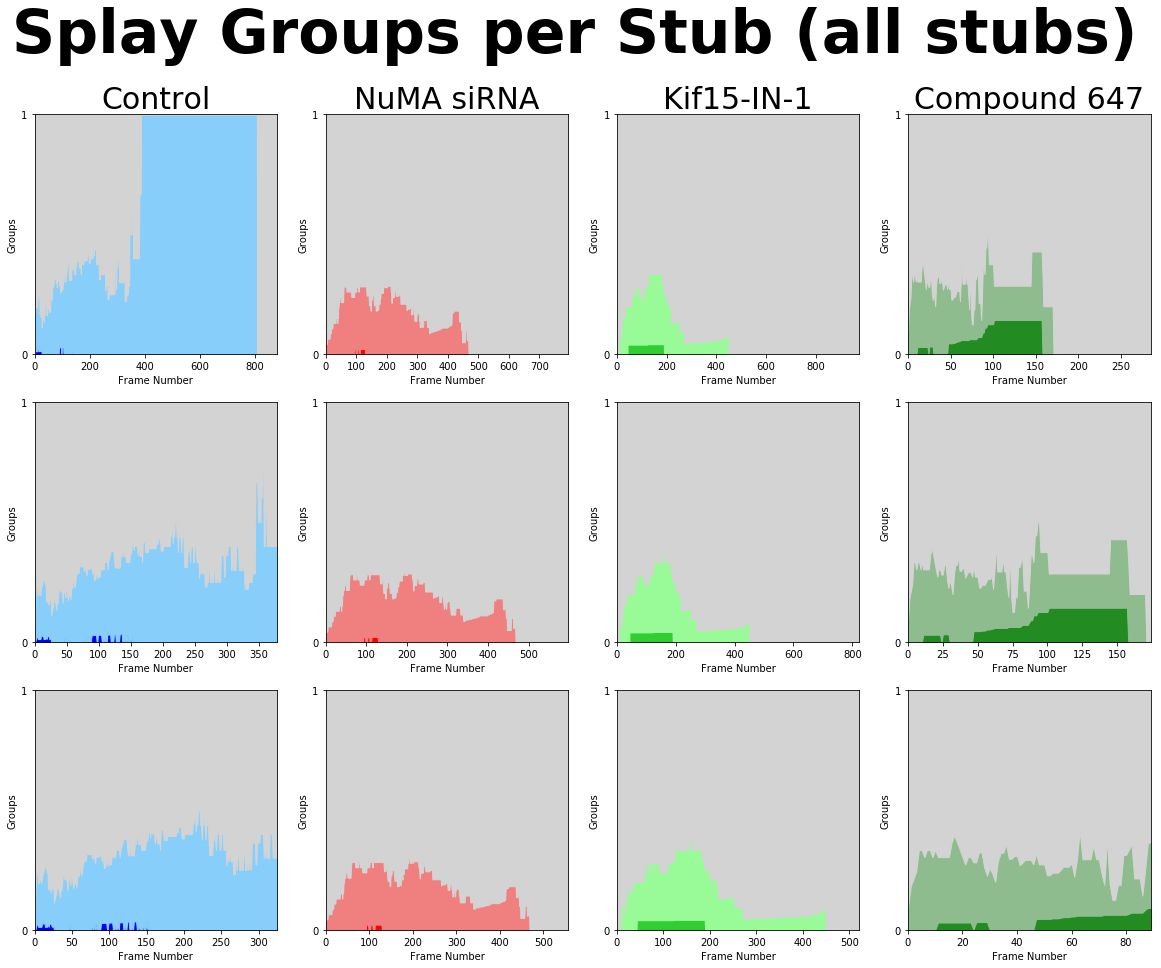

In [8]:
fig = plt.figure(figsize=[20,15])

for i in range(4):
    
    fig.add_subplot(3,4,i+1)
    
    plt.fill_between(fFramesALL[i], 0, fGroupsFsPlotALL[i][1], color=colors3[i])
    plt.fill_between(fFramesALL[i], fGroupsFsPlotALL[i][1], fGroupsFsPlotALL[i][0], color=colors2[i])
    plt.fill_between(fFramesALL[i], fGroupsFsPlotALL[i][0], 1, color='lightgray')
    plt.xlim(0,len(fFramesALL[i])-1)
    plt.ylim(0,1)
    plt.yticks([0,1])
    plt.title(names[i], size=30)
    plt.xlabel('Frame Number', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+5)
    
    plt.fill_between(fFramesALLF5[i], 0, fGroupsFsPlotALLF5[i][1], color=colors3[i])
    plt.fill_between(fFramesALLF5[i], fGroupsFsPlotALLF5[i][1], fGroupsFsPlotALLF5[i][0], color=colors2[i])
    plt.fill_between(fFramesALLF5[i], fGroupsFsPlotALLF5[i][0], 1, color='lightgray')
    plt.xlim(0,len(fFramesALLF5[i])-1)
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Frame Number', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+9)
    
    plt.fill_between(fFramesALLF10[i], 0, fGroupsFsPlotALLF10[i][1], color=colors3[i])
    plt.fill_between(fFramesALLF10[i], fGroupsFsPlotALLF10[i][1], fGroupsFsPlotALLF10[i][0], color=colors2[i])
    plt.fill_between(fFramesALLF10[i], fGroupsFsPlotALLF10[i][0], 1, color='lightgray')
    plt.xlim(0,len(fFramesALLF10[i])-1)
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Frame Number', size=10)
    plt.ylabel('Groups', size=10)



fig.suptitle('Splay Groups per Stub (all stubs)', size=60, weight=800)

Text(0, 0.5, 'Groups')

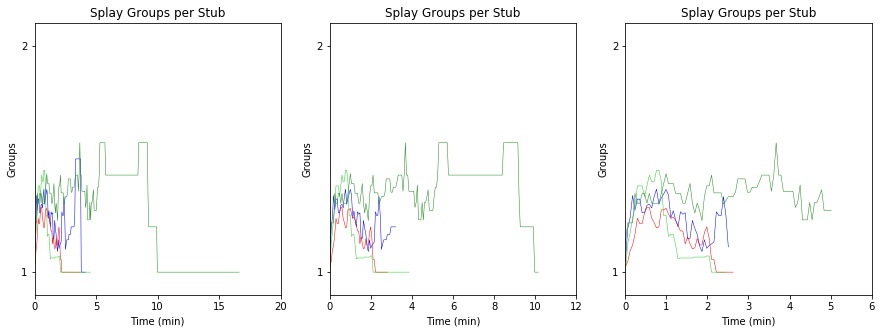

In [9]:
fig = plt.figure(figsize=[15,5])



fig.add_subplot(1,3,1)

for i in range(4):
    plt.plot(tTimes[i], tAvgGs[i], c=colors3[i], linewidth=0.5)

plt.xlim(0,20)
plt.xticks([0,5,10,15,20])
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Time (min)')
plt.ylabel('Groups')



fig.add_subplot(1,3,2)

for i in range(4):
    plt.plot(tTimesT5[i], tAvgGsT5[i], c=colors3[i], linewidth=0.5)

plt.xlim(0,12)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Time (min)')
plt.ylabel('Groups')



fig.add_subplot(1,3,3)

for i in range(4):
    plt.plot(tTimesT10[i], tAvgGsT10[i], c=colors3[i], linewidth=0.5)

plt.xlim(0,6)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Time (min)')
plt.ylabel('Groups')

Text(0, 0.5, 'Groups')

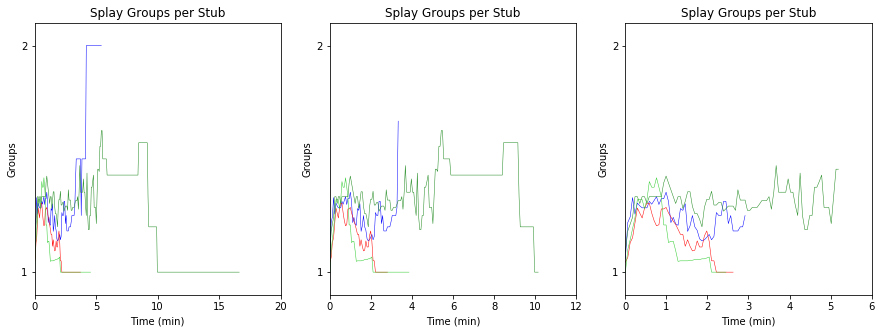

In [10]:
fig = plt.figure(figsize=[15,5])



fig.add_subplot(1,3,1)

for i in range(4):
    plt.plot(tTimesALL[i], tAvgGsALL[i], c=colors3[i], linewidth=0.5)

plt.xlim(0,20)
plt.xticks([0,5,10,15,20])
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Time (min)')
plt.ylabel('Groups')



fig.add_subplot(1,3,2)

for i in range(4):
    plt.plot(tTimesALLT5[i], tAvgGsALLT5[i], c=colors3[i], linewidth=0.5)

plt.xlim(0,12)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Time (min)')
plt.ylabel('Groups')



fig.add_subplot(1,3,3)

for i in range(4):
    plt.plot(tTimesALLT10[i], tAvgGsALLT10[i], c=colors3[i], linewidth=0.5)

plt.xlim(0,6)
plt.ylim(0.9,2.1)
plt.yticks([1,2])
plt.title('Splay Groups per Stub')
plt.xlabel('Time (min)')
plt.ylabel('Groups')

Text(0.5, 0.98, 'Splay Groups per Stub')

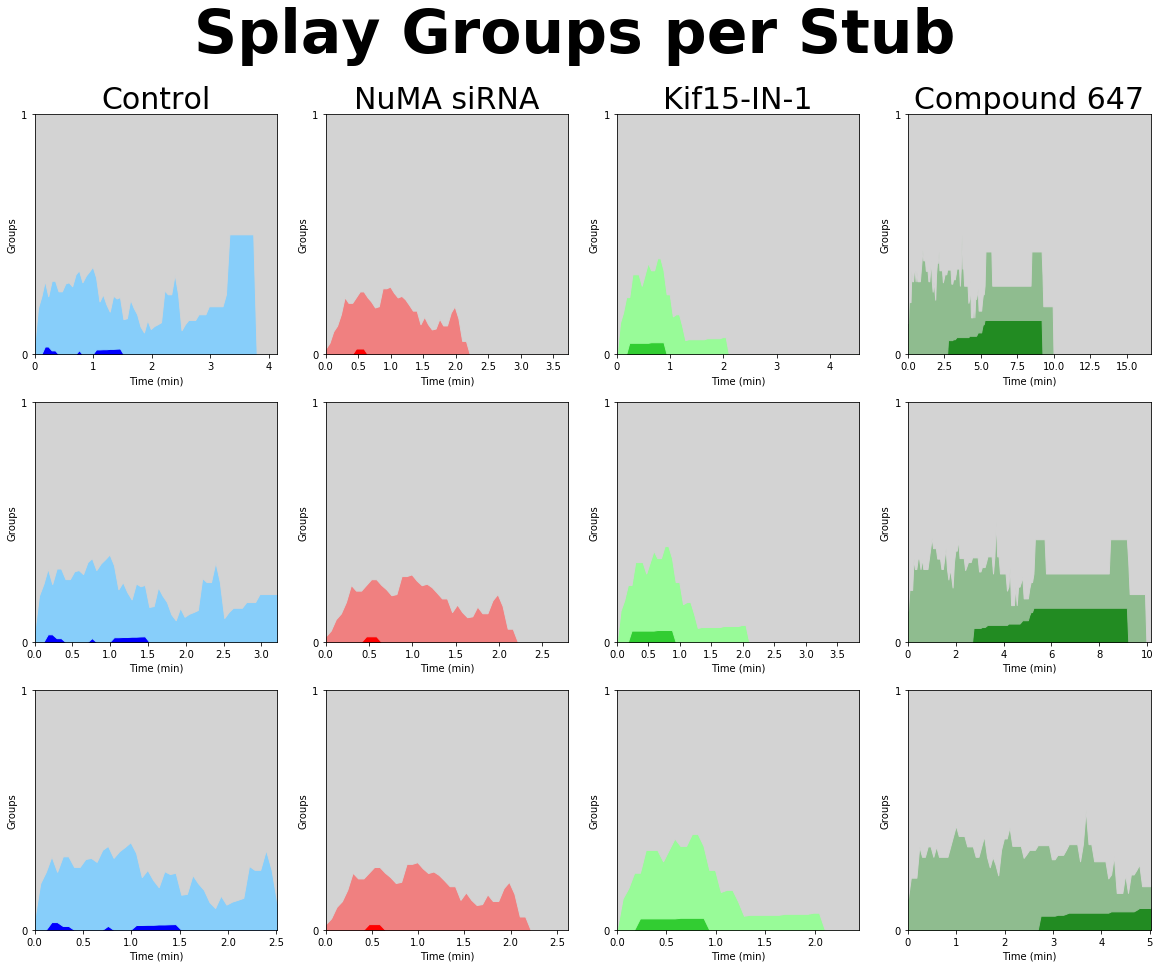

In [11]:
fig = plt.figure(figsize=[20,15])



for i in range(4):
    
    fig.add_subplot(3,4,i+1)
    
    plt.fill_between(tTimes[i], 0, tGroupsFsPlot[i][1], color=colors3[i])
    plt.fill_between(tTimes[i], tGroupsFsPlot[i][1], tGroupsFsPlot[i][0], color=colors2[i])
    plt.fill_between(tTimes[i], tGroupsFsPlot[i][0], 1, color='lightgray')
    plt.xlim(0,tTimes[i][len(tTimes[i])-1])
    plt.ylim(0,1)
    plt.yticks([0,1])
    plt.title(names[i], size=30)
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+5)
    
    plt.fill_between(tTimesT5[i], 0, tGroupsFsPlotT5[i][1], color=colors3[i])
    plt.fill_between(tTimesT5[i], tGroupsFsPlotT5[i][1], tGroupsFsPlotT5[i][0], color=colors2[i])
    plt.fill_between(tTimesT5[i], tGroupsFsPlotT5[i][0], 1, color='lightgray')
    plt.xlim(0,tTimesT5[i][len(tTimesT5[i])-1])
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+9)
    
    plt.fill_between(tTimesT10[i], 0, tGroupsFsPlotT10[i][1], color=colors3[i])
    plt.fill_between(tTimesT10[i], tGroupsFsPlotT10[i][1], tGroupsFsPlotT10[i][0], color=colors2[i])
    plt.fill_between(tTimesT10[i], tGroupsFsPlotT10[i][0], 1, color='lightgray')
    plt.xlim(0,tTimesT10[i][len(tTimesT10[i])-1])
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)



fig.suptitle('Splay Groups per Stub', size=60, weight=800)

Text(0.5, 0.98, 'Splay Groups per Stub (all stubs)')

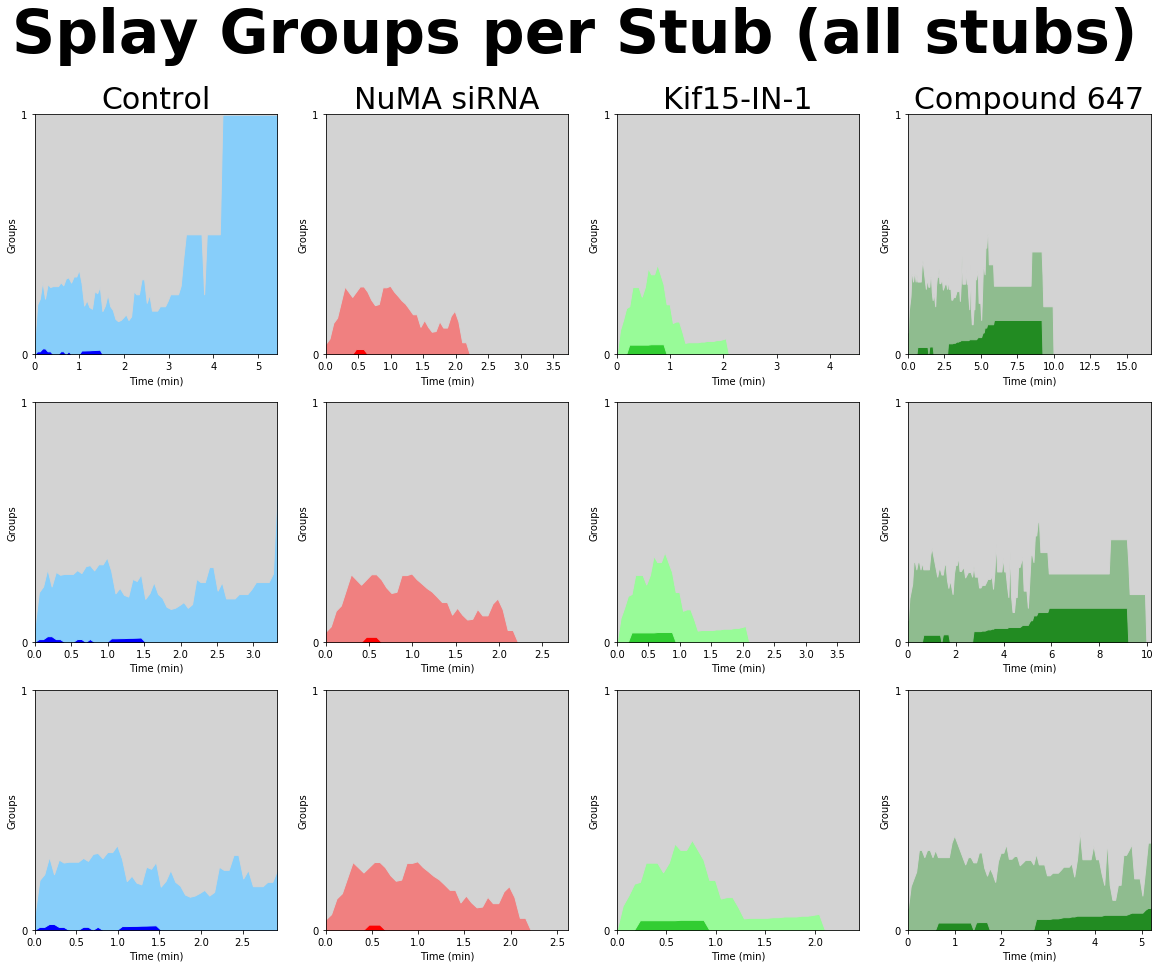

In [12]:
fig = plt.figure(figsize=[20,15])



for i in range(4):
    
    fig.add_subplot(3,4,i+1)
    
    plt.fill_between(tTimesALL[i], 0, tGroupsFsPlotALL[i][1], color=colors3[i])
    plt.fill_between(tTimesALL[i], tGroupsFsPlotALL[i][1], tGroupsFsPlotALL[i][0], color=colors2[i])
    plt.fill_between(tTimesALL[i], tGroupsFsPlotALL[i][0], 1, color='lightgray')
    plt.xlim(0,tTimesALL[i][len(tTimesALL[i])-1])
    #plt.xlim(0,10)
    plt.ylim(0,1)
    plt.yticks([0,1])
    plt.title(names[i], size=30)
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+5)
    
    plt.fill_between(tTimesALLT5[i], 0, tGroupsFsPlotALLT5[i][1], color=colors3[i])
    plt.fill_between(tTimesALLT5[i], tGroupsFsPlotALLT5[i][1], tGroupsFsPlotALLT5[i][0], color=colors2[i])
    plt.fill_between(tTimesALLT5[i], tGroupsFsPlotALLT5[i][0], 1, color='lightgray')
    plt.xlim(0,tTimesALLT5[i][len(tTimesALLT5[i])-1])
    #plt.xlim(0,10)
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)



for i in range(4):
    
    fig.add_subplot(3,4,i+9)
    
    plt.fill_between(tTimesALLT10[i], 0, tGroupsFsPlotALLT10[i][1], color=colors3[i])
    plt.fill_between(tTimesALLT10[i], tGroupsFsPlotALLT10[i][1], tGroupsFsPlotALLT10[i][0], color=colors2[i])
    plt.fill_between(tTimesALLT10[i], tGroupsFsPlotALLT10[i][0], 1, color='lightgray')
    plt.xlim(0,tTimesALLT10[i][len(tTimesALLT10[i])-1])
    #plt.xlim(0,10)
    plt.ylim(0,1)
    plt.yticks([0,1])
    #plt.title(names[i], size=30)
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)



fig.suptitle('Splay Groups per Stub (all stubs)', size=60, weight=800)

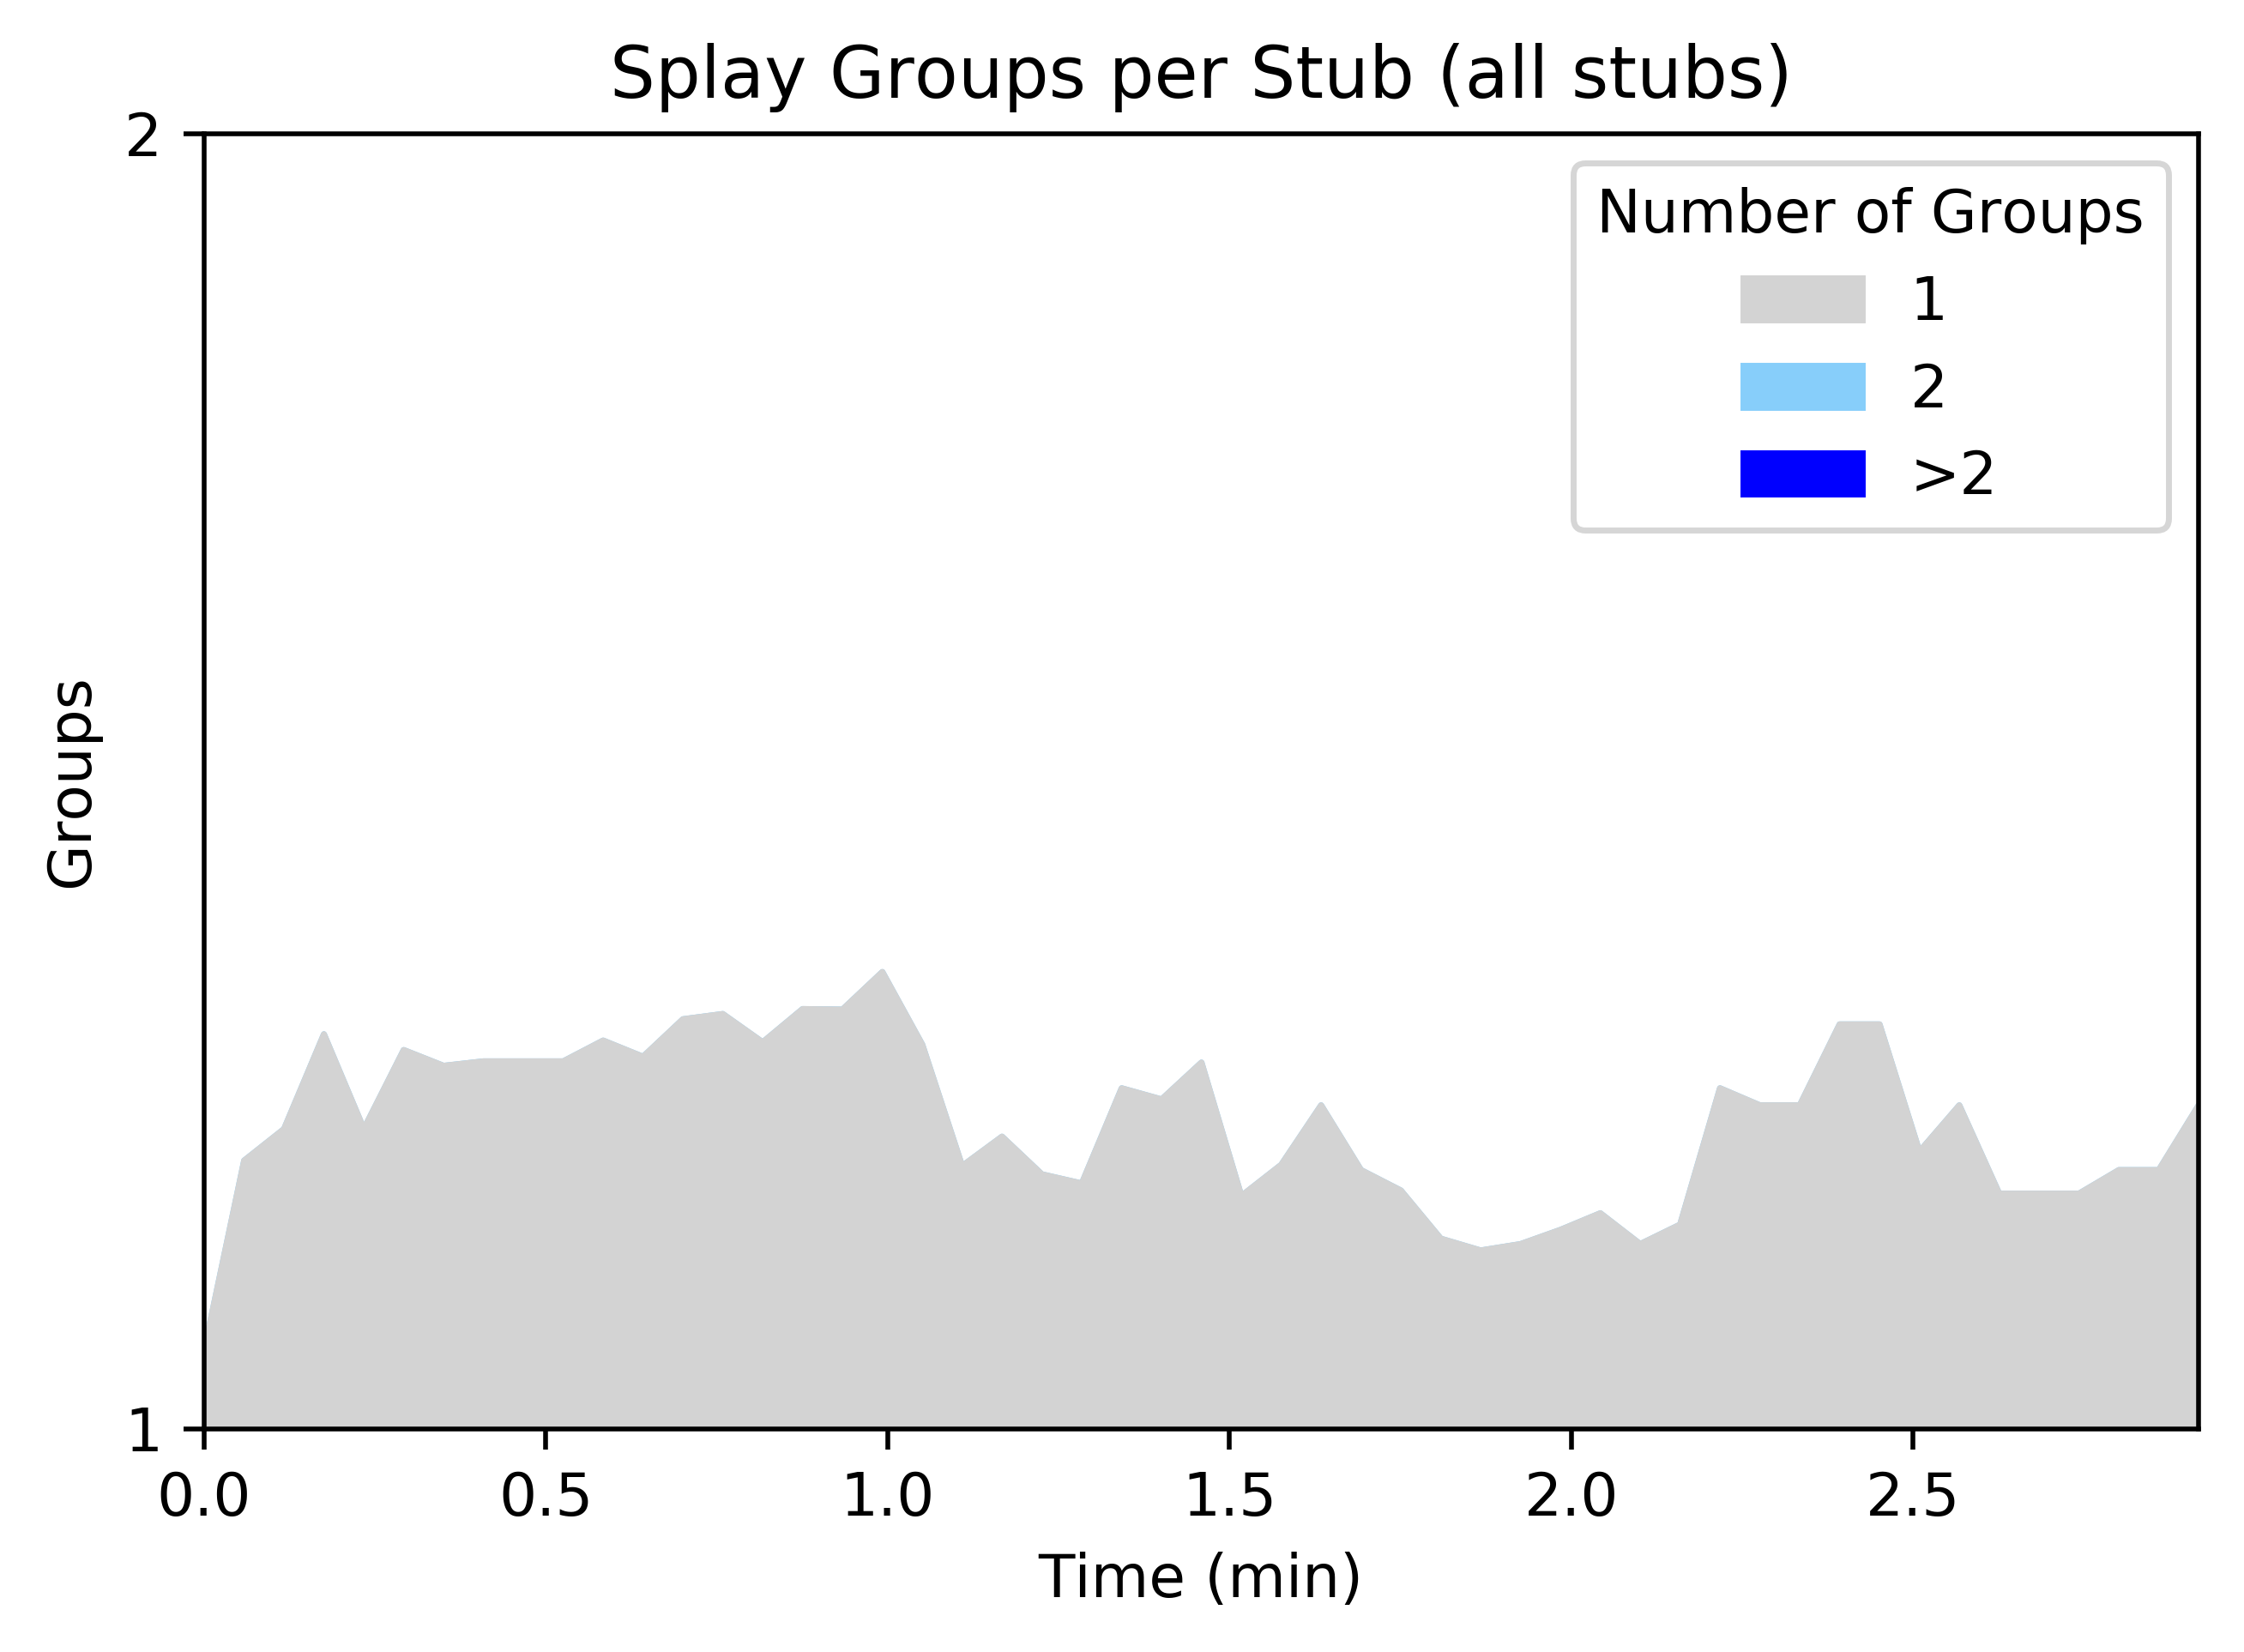

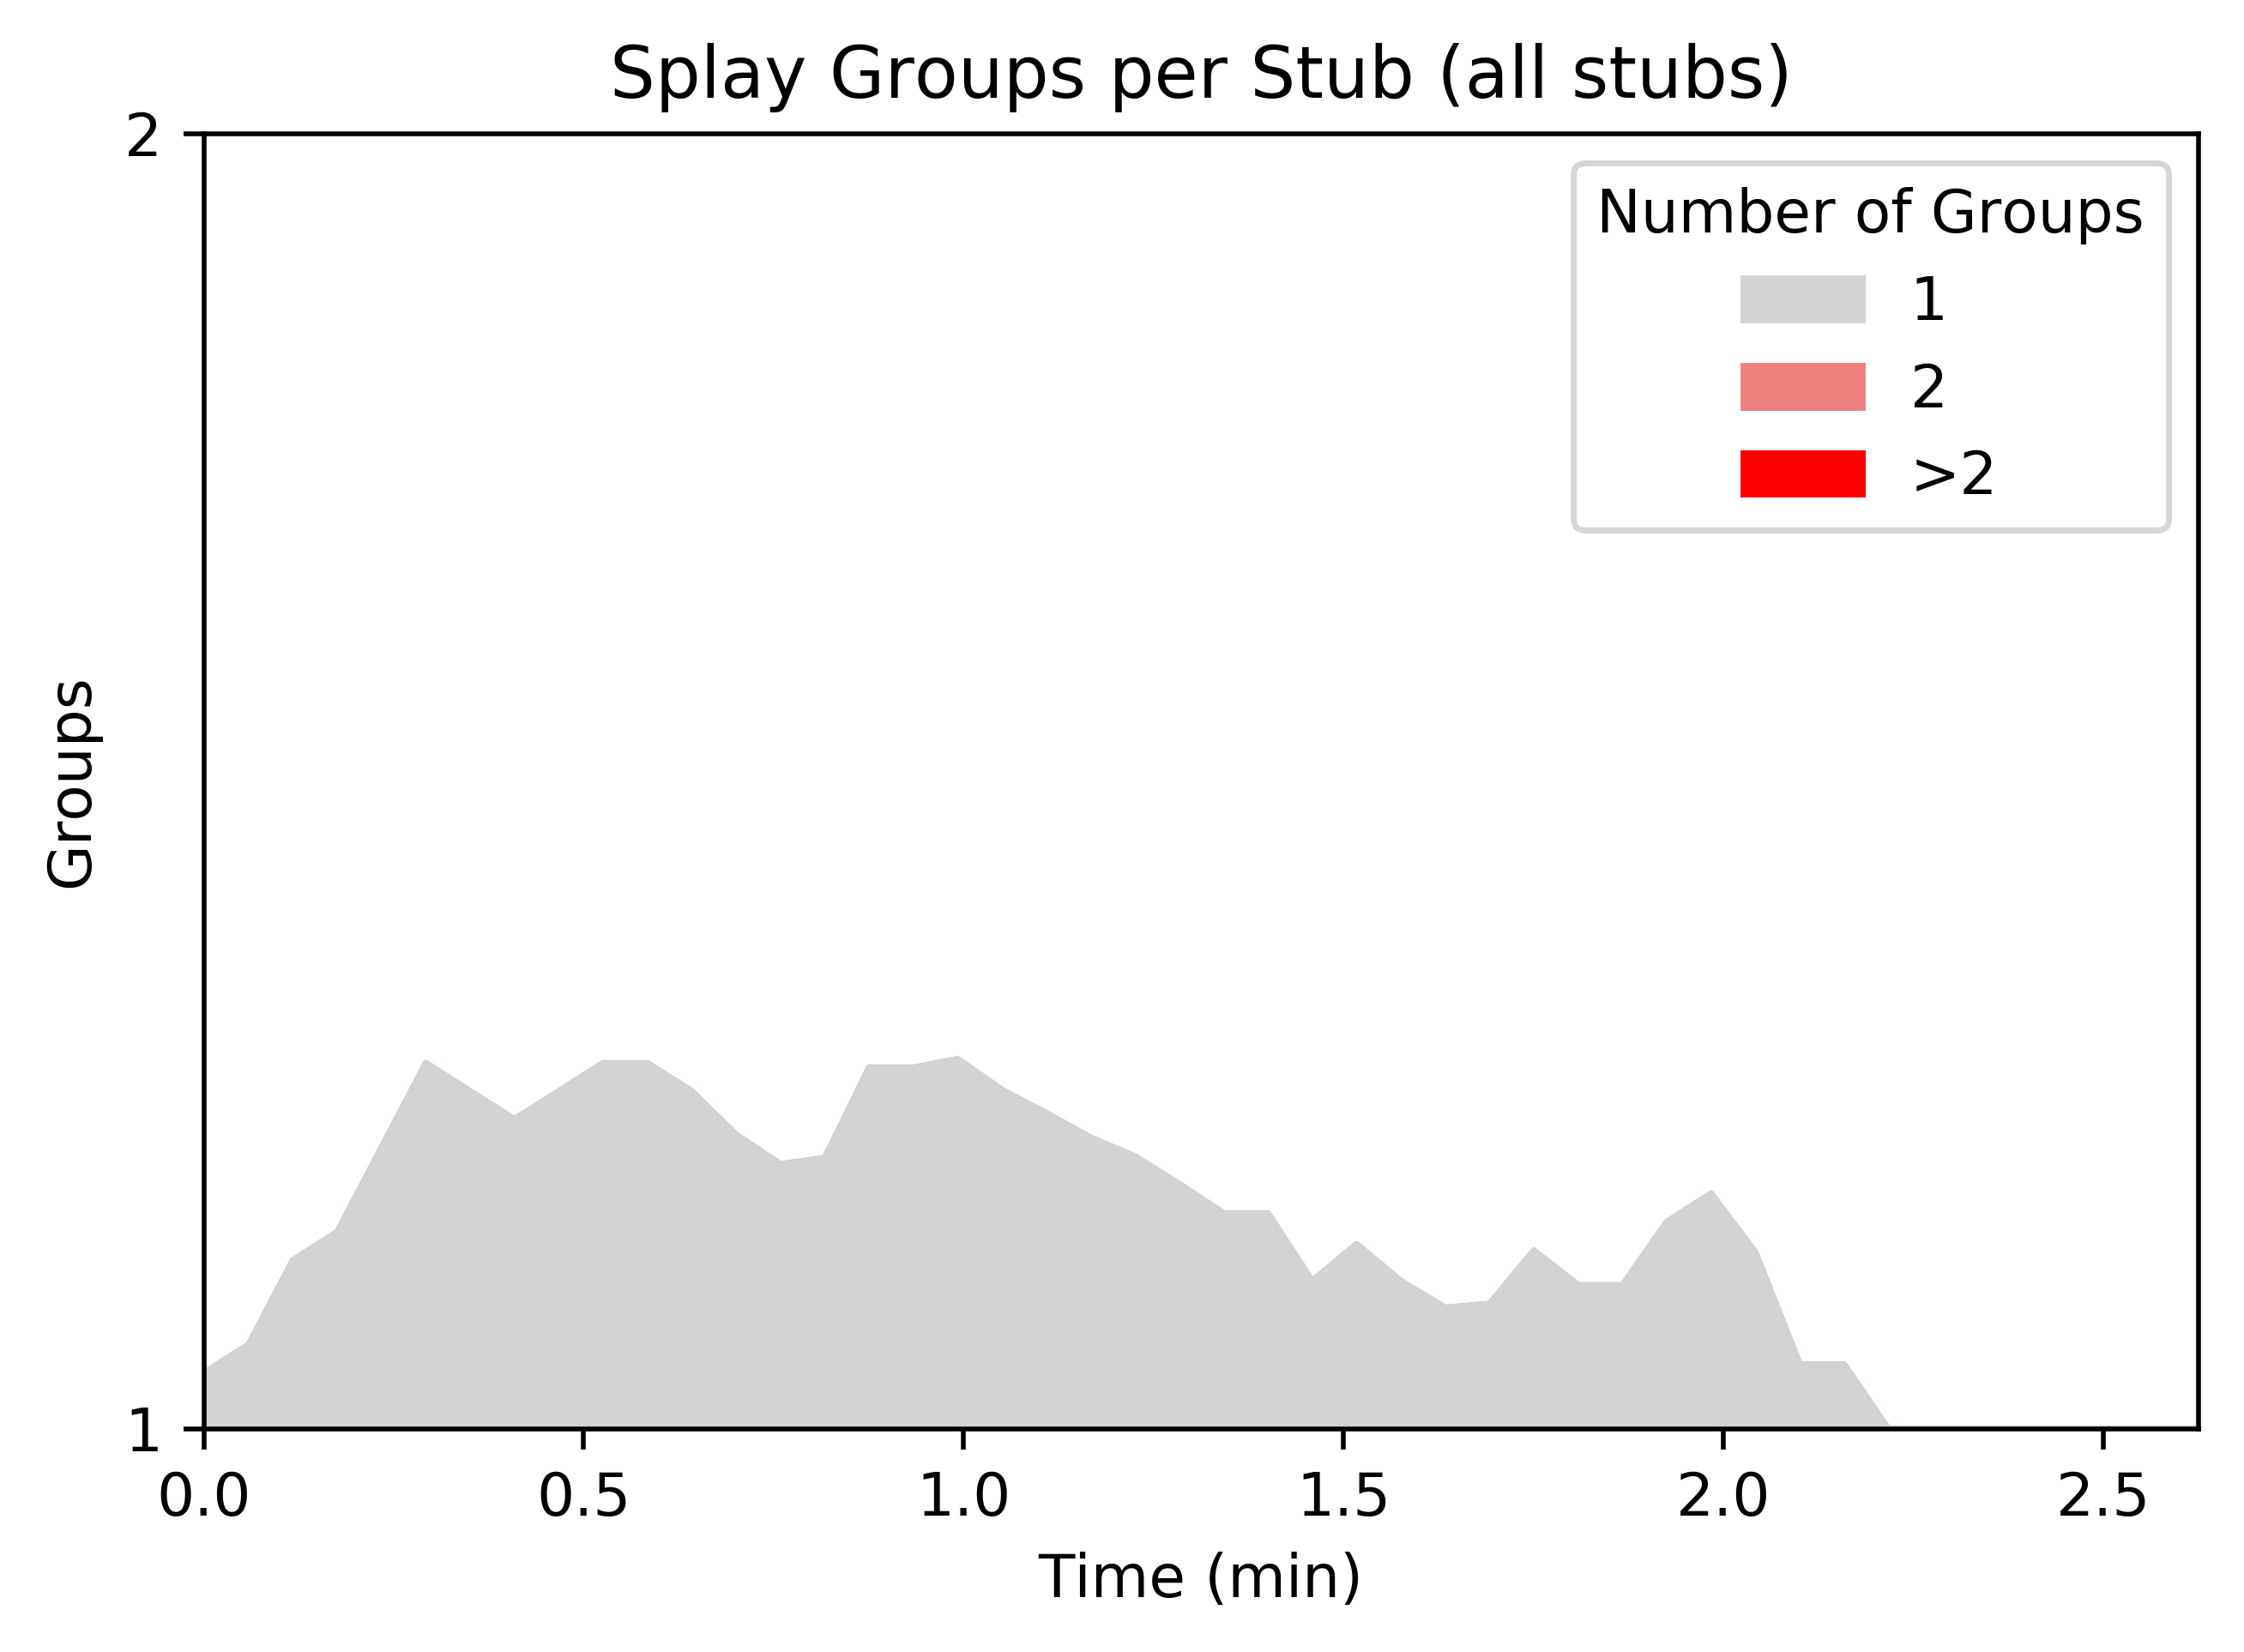

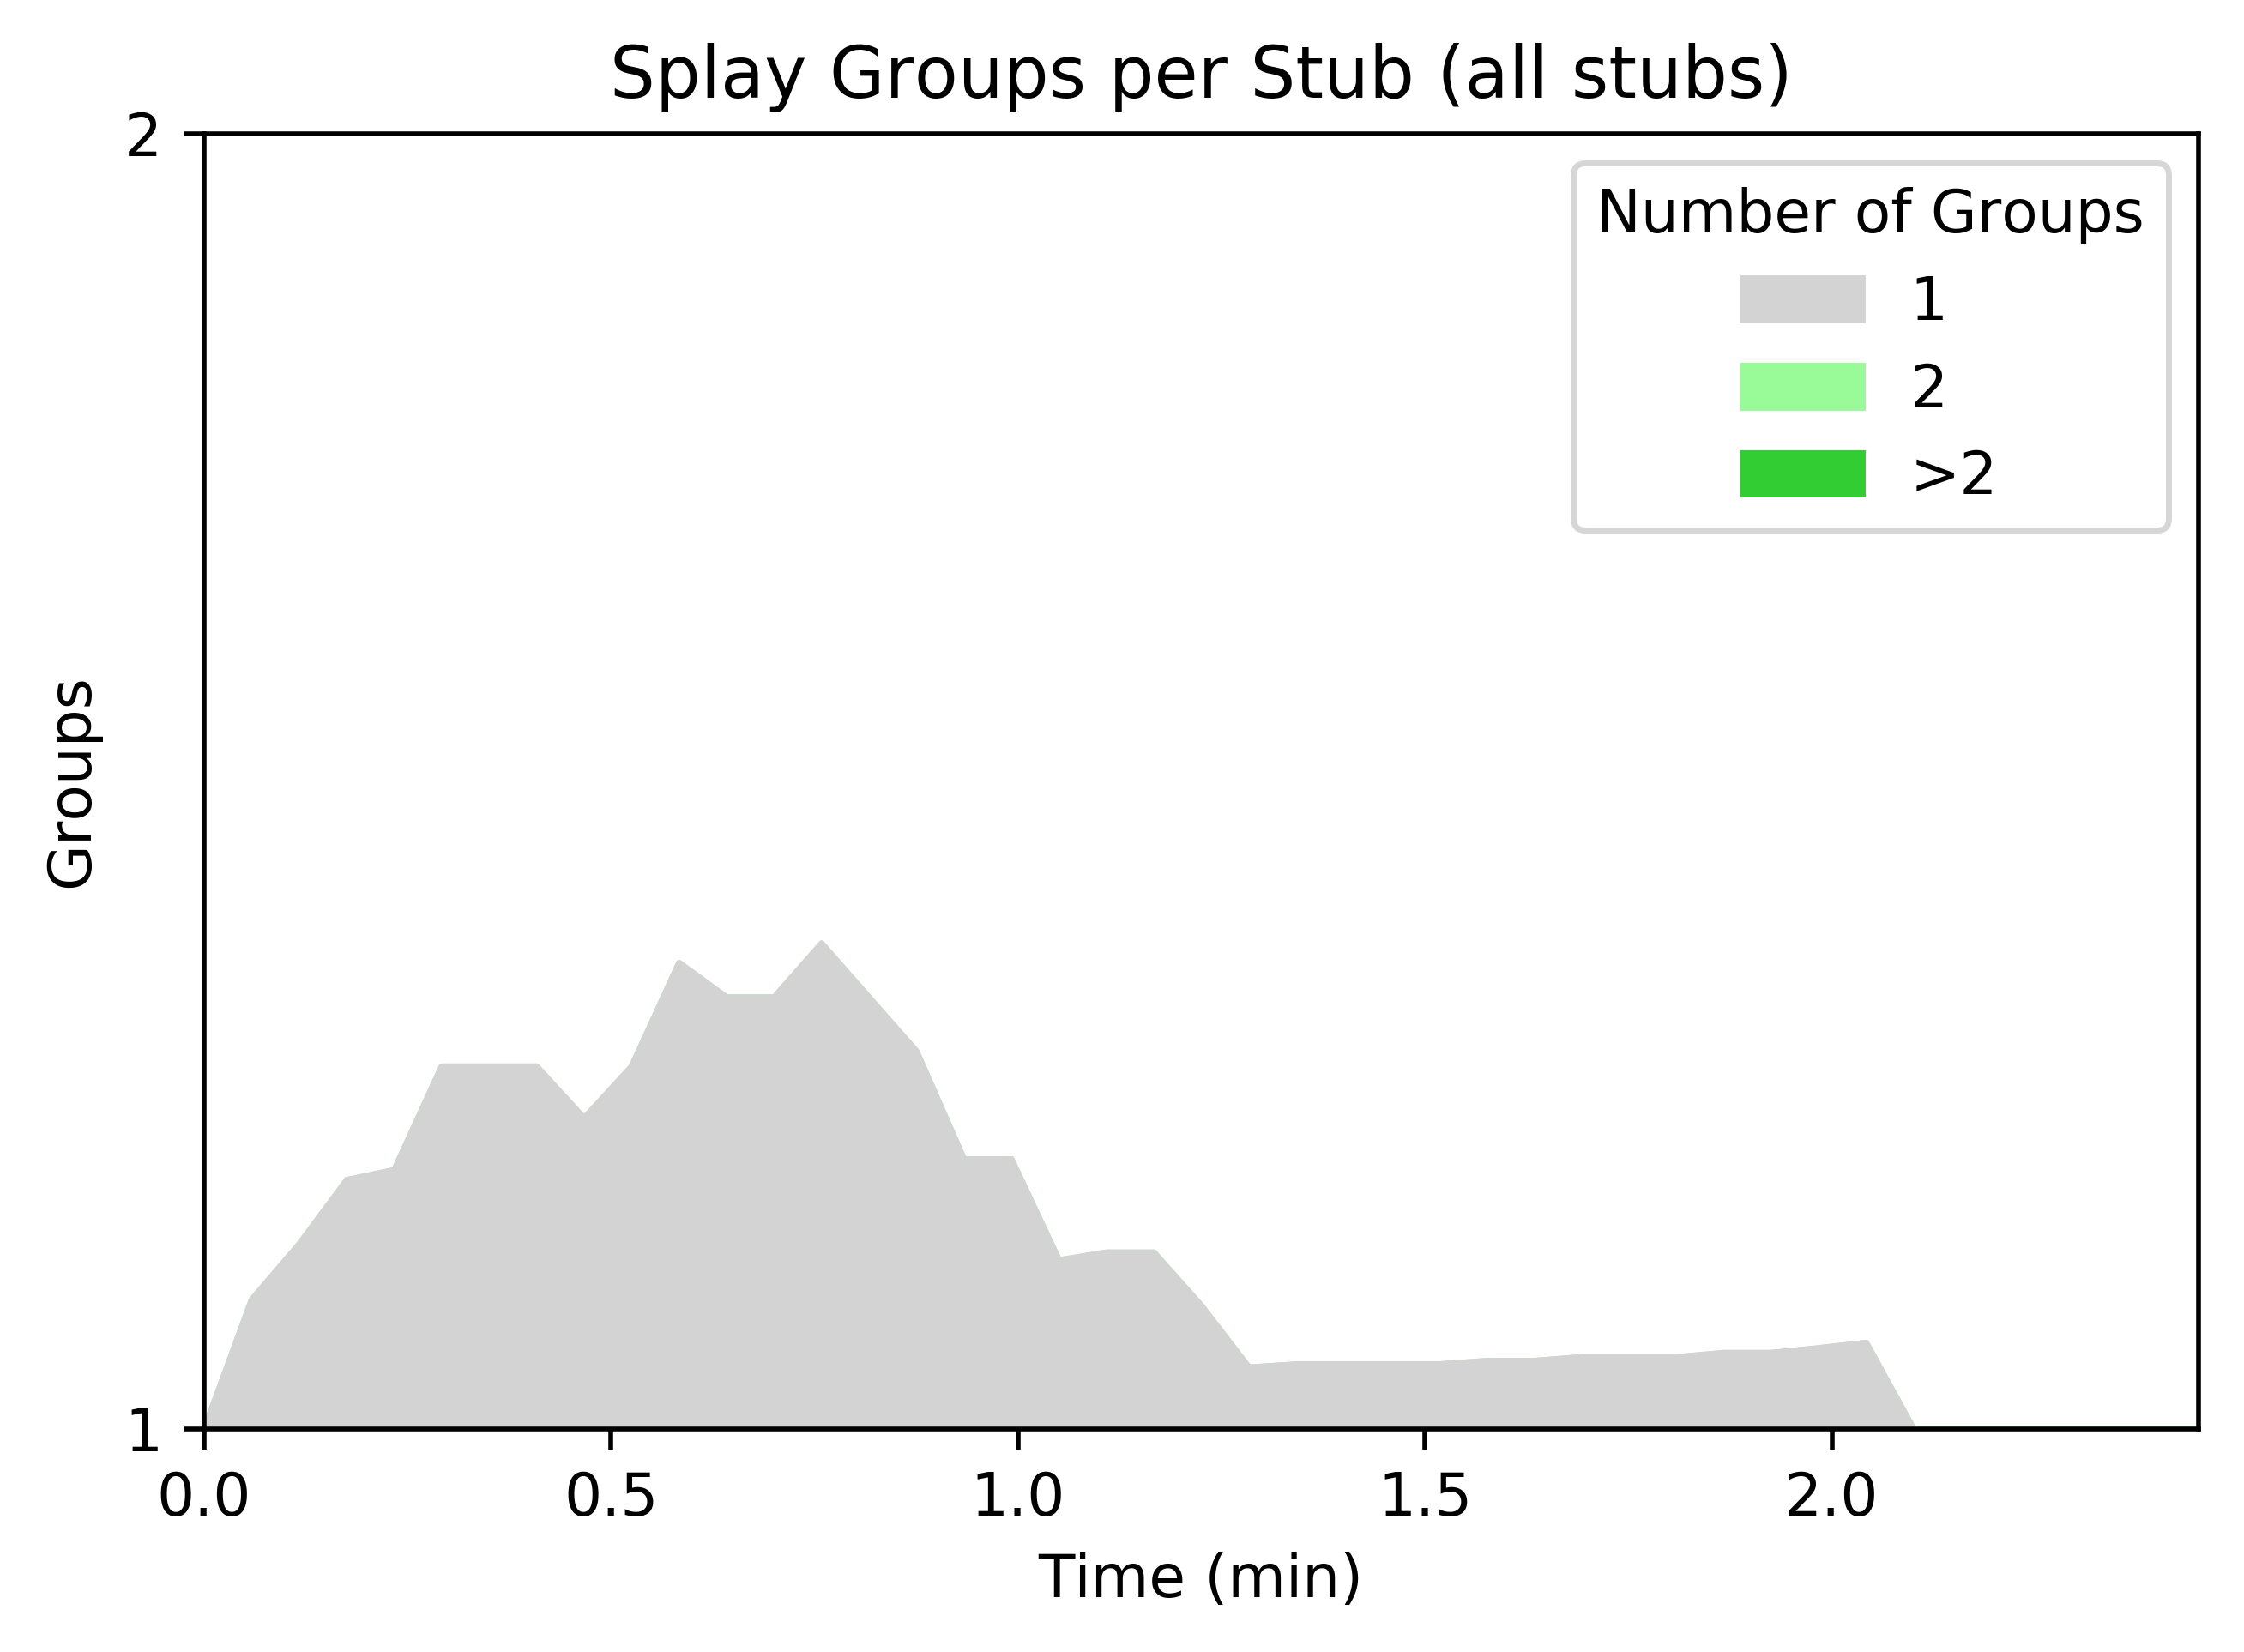

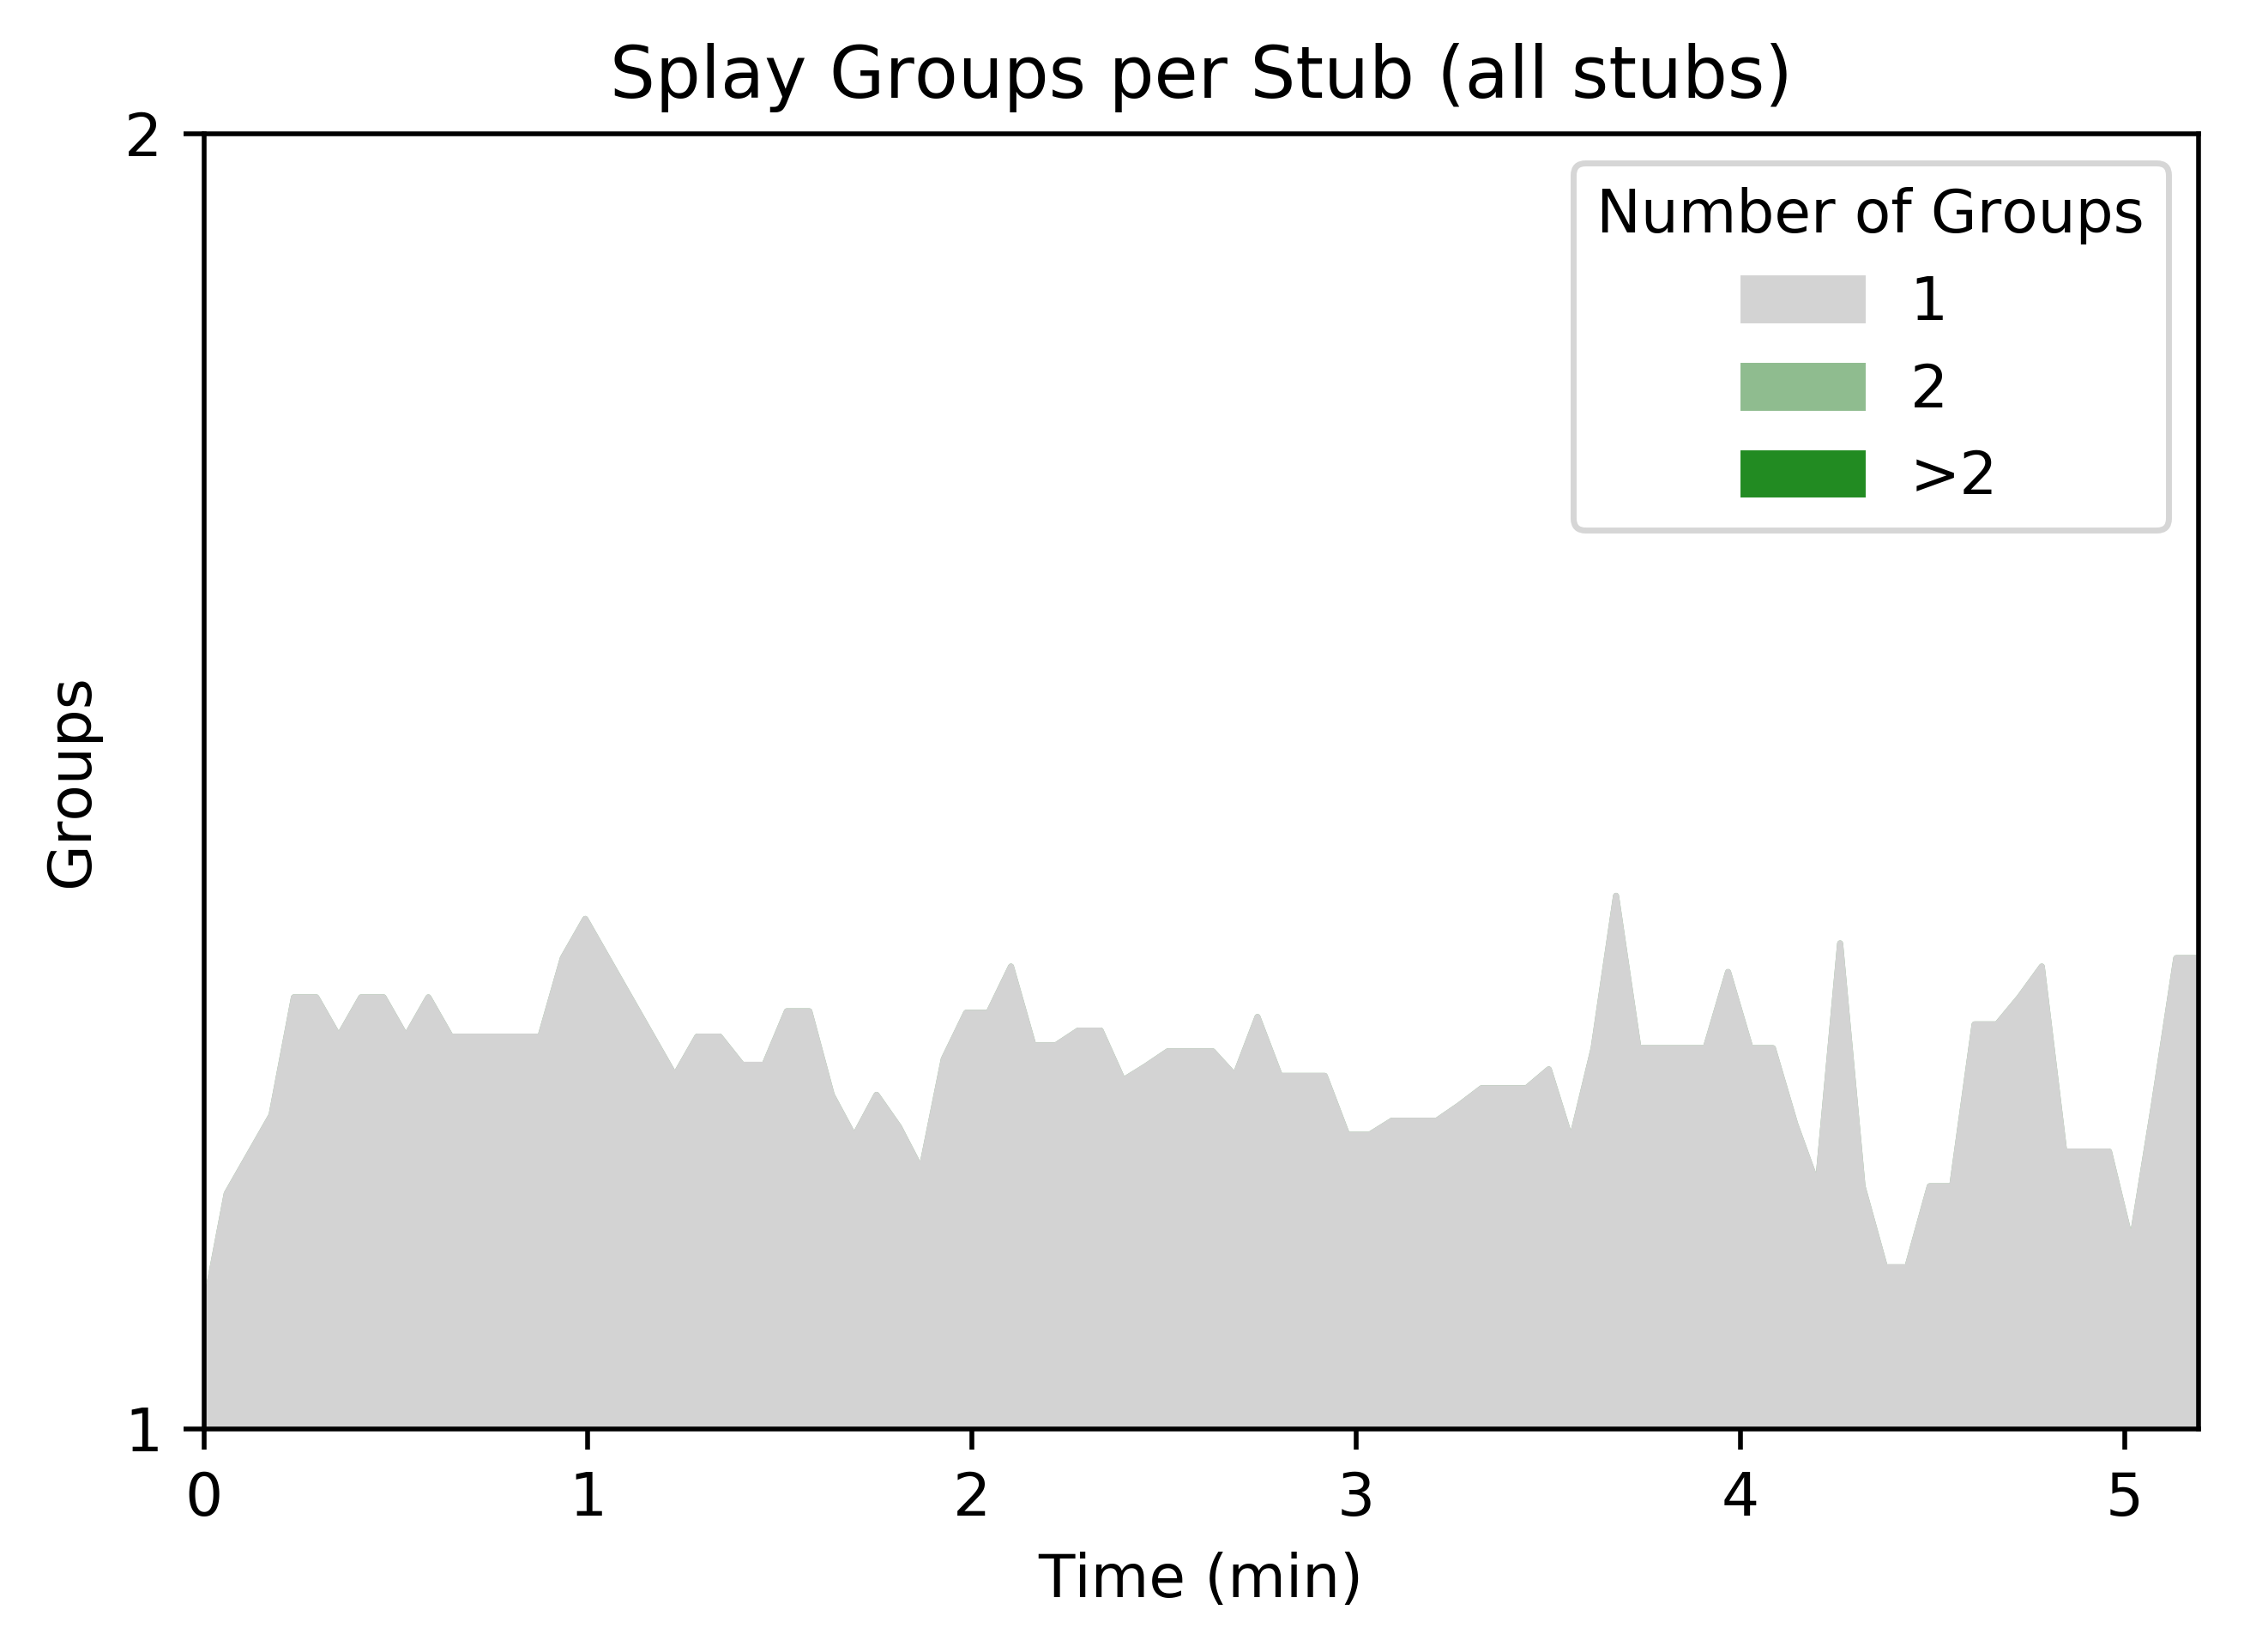

In [8]:
onePatchWT = pchs.Patch(color='lightgray', label='1')
twoPatchWT = pchs.Patch(color=colors2[0], label='2')
morePatchWT = pchs.Patch(color=colors3[0], label='>2')

onePatchNuMA = pchs.Patch(color='lightgray', label='1')
twoPatchNuMA = pchs.Patch(color=colors2[1], label='2')
morePatchNuMA = pchs.Patch(color=colors3[1], label='>2')

onePatchKN1 = pchs.Patch(color='lightgray', label='1')
twoPatchKN1 = pchs.Patch(color=colors2[2], label='2')
morePatchKN1 = pchs.Patch(color=colors3[2], label='>2')

onePatchK647 = pchs.Patch(color='lightgray', label='1')
twoPatchK647 = pchs.Patch(color=colors2[3], label='2')
morePatchK647 = pchs.Patch(color=colors3[3], label='>2')

patchesWT = [onePatchWT, twoPatchWT, morePatchWT]
patchesNuMA = [onePatchNuMA, twoPatchNuMA, morePatchNuMA]
patchesKN1 = [onePatchKN1, twoPatchKN1, morePatchKN1]
patchesK647 = [onePatchK647, twoPatchK647, morePatchK647]

patches = [patchesWT, patchesNuMA, patchesKN1, patchesK647]



for i in range(4):
    
    
    
    plt.figure(dpi=500)
    plt.fill_between(tTimesALLT10[i], 0, tGroupsFsPlotALLT10[i][1], color=colors3[i])
    plt.fill_between(tTimesALLT10[i], tGroupsFsPlotALLT10[i][1], tGroupsFsPlotALLT10[i][0], color=colors2[i])
    plt.fill_between(tTimesALLT10[i], tGroupsFsPlotALLT10[i][0], 1, color='lightgray')
    plt.legend(handles=patches[i], title='Number of Groups')
    plt.xlim(0,tTimesALLT10[i][len(tTimesALLT10[i])-1])
    #plt.xlim(0,10)
    plt.ylim(1,2)
    plt.yticks([1,2])
    plt.title('Splay Groups per Stub (all stubs)')
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)

NameError: name 'patches' is not defined

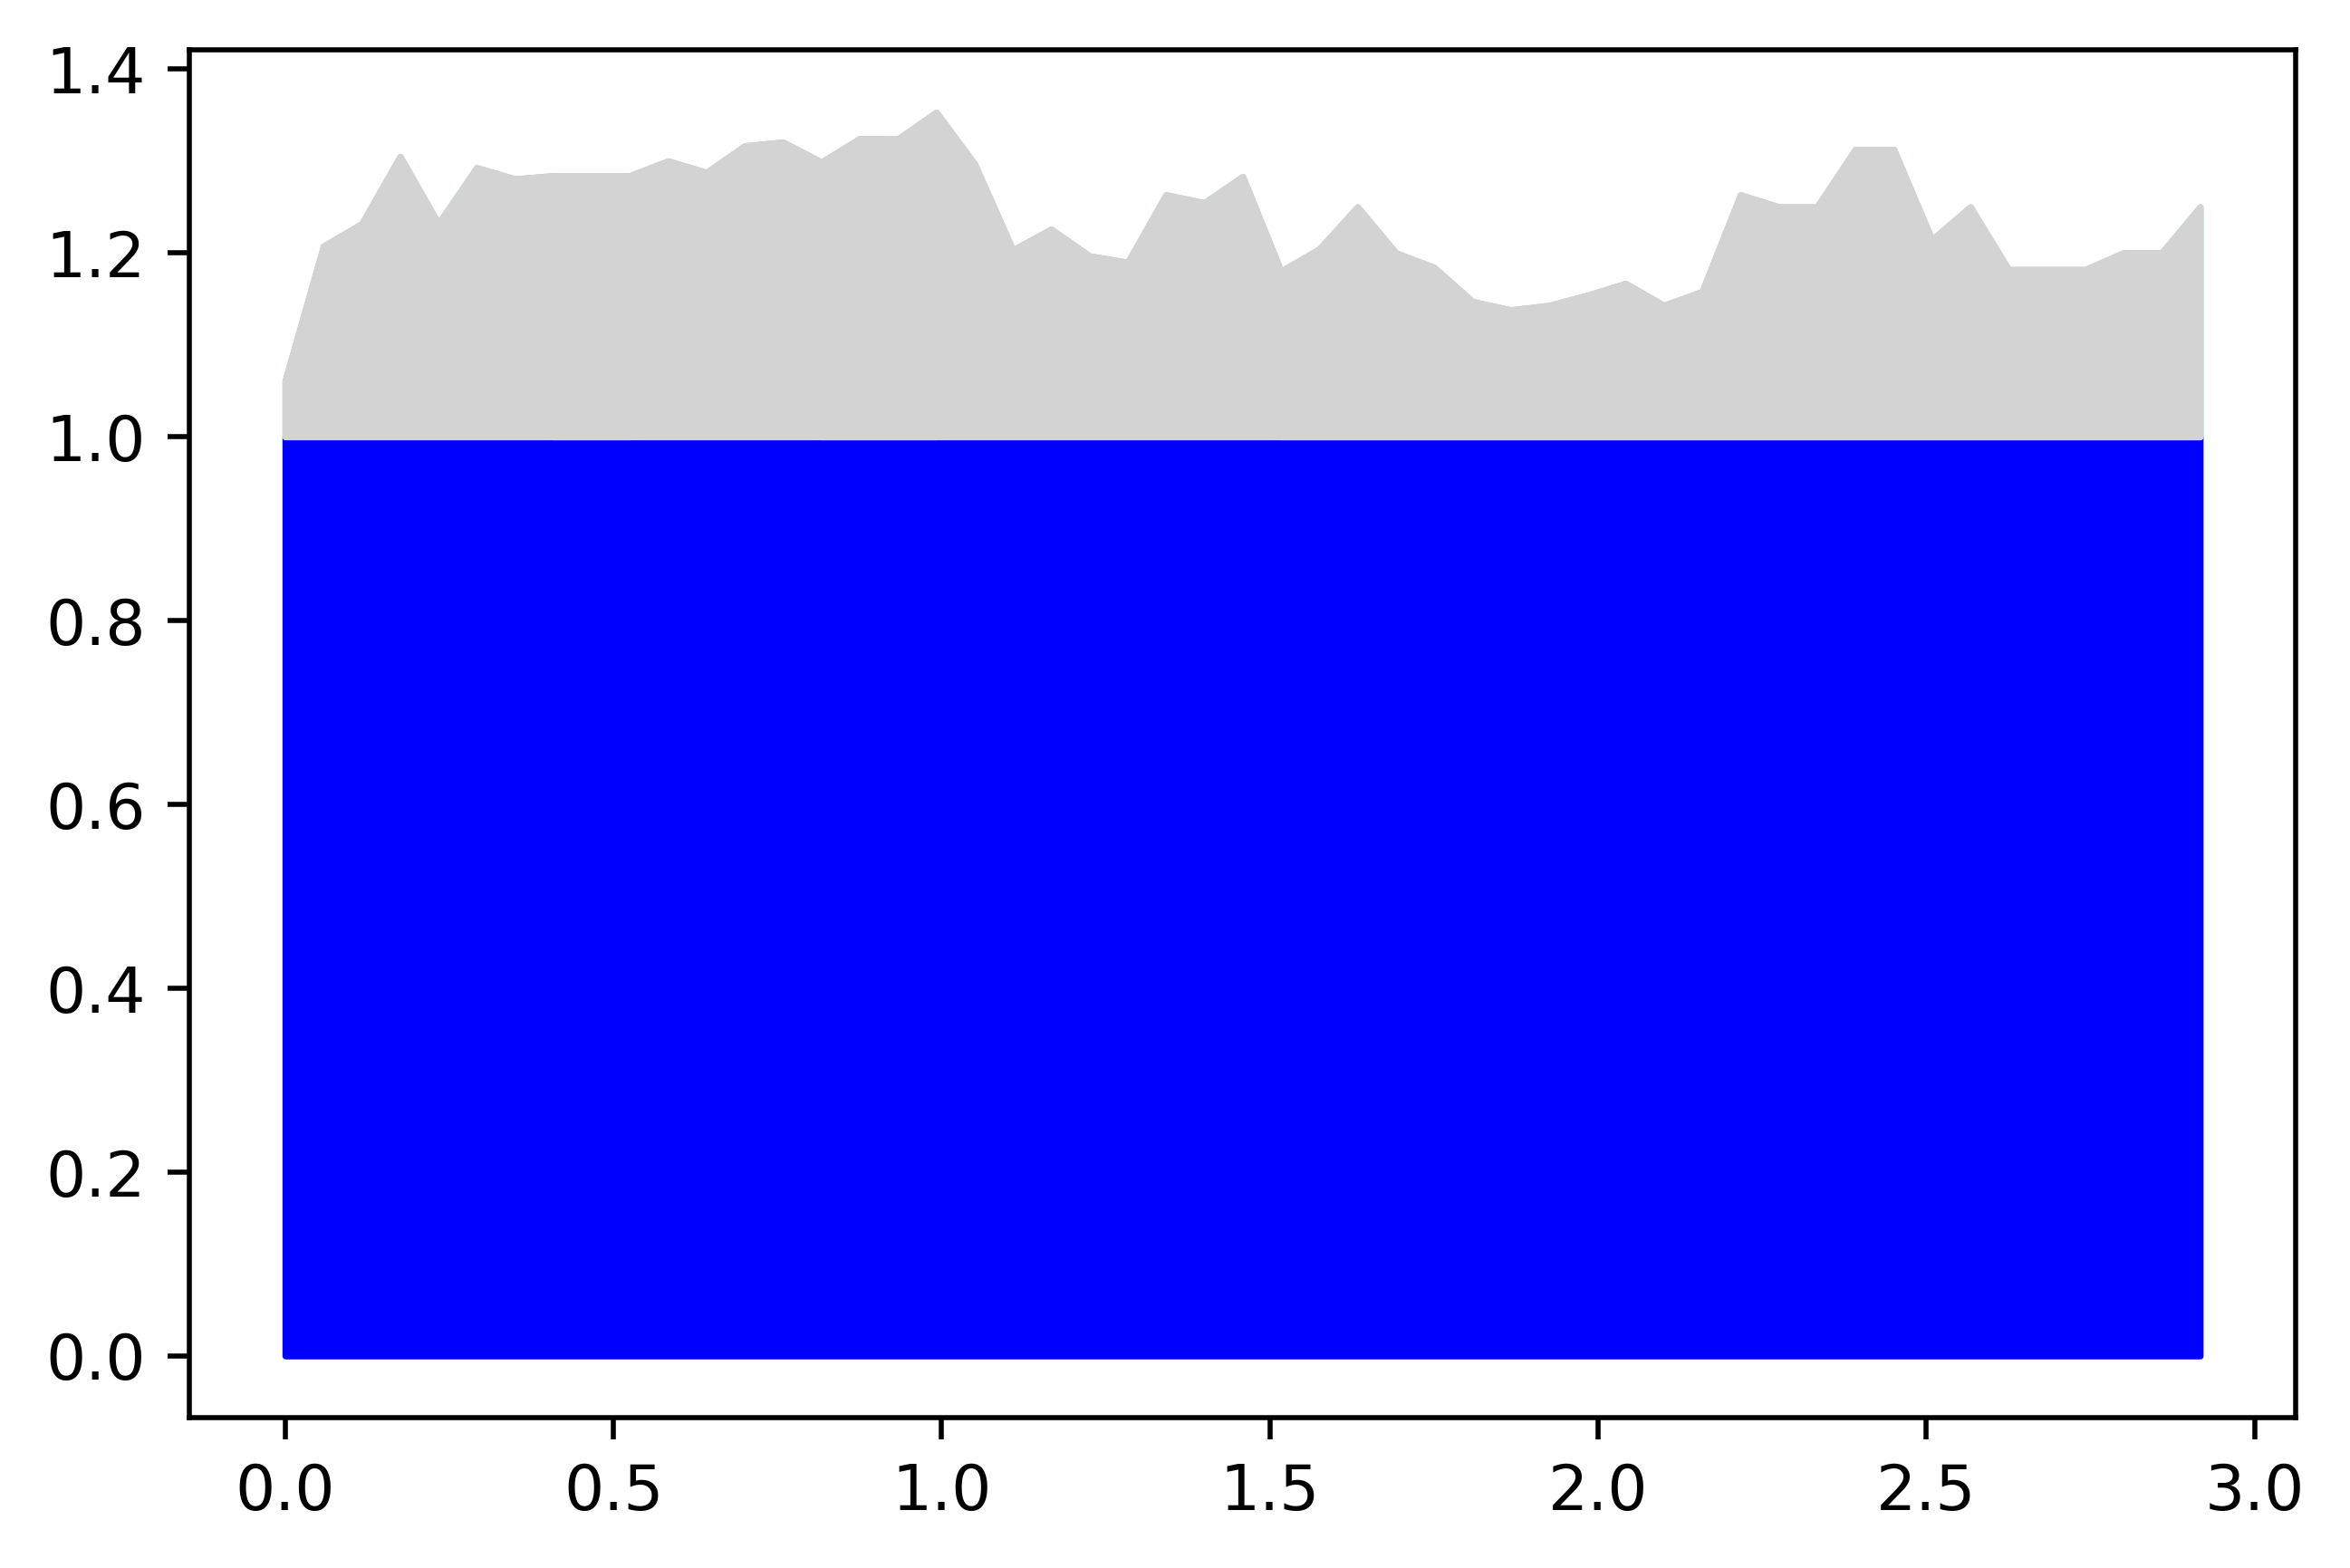

In [6]:
for i in range(2):
    plt.figure(dpi=500)
    plt.fill_between(tTimesALLT10[i], 0, tGroupsFsPlotALLT10[i][1], color=colors3[i])
    plt.fill_between(tTimesALLT10[i], tGroupsFsPlotALLT10[i][1], tGroupsFsPlotALLT10[i][0], color=colors2[i])
    plt.fill_between(tTimesALLT10[i], tGroupsFsPlotALLT10[i][0], 1, color='lightgray')
    plt.legend(handles=patches[i], title='Number of Groups')
    plt.xlim(0,2)
    plt.xticks([0,1,2])
    plt.ylim(0,1)
    plt.yticks([0,1])
    plt.title('Average Splay Groups per Stub')
    plt.xlabel('Time (min)', size=10)
    plt.ylabel('Groups', size=10)
    plt.close()

titles = ['Splay Groups vs Time After Ablation\n(control stubs)', 'Splay Groups vs Time After Ablation\n(NuMA siRNA stubs)']

for i in range(2):
    plt.figure(dpi=500)
    plt.fill_between(tTimesALL[i], 0, tGroupsFsPlotALL[i][1], color=colors3[i])
    plt.fill_between(tTimesALL[i], tGroupsFsPlotALL[i][1], tGroupsFsPlotALL[i][0], color=colors2[i])
    plt.fill_between(tTimesALL[i], tGroupsFsPlotALL[i][0], 1, color='lightgray')
    plt.legend(handles=patches[i], title='Groups')
    plt.xlim(0,3)
    plt.xticks([0,1,2,3])
    plt.ylim(0,1)
    plt.yticks([0,1])
    plt.title(titles[i])
    plt.xlabel('Time After Ablation (min)', size=10)
    plt.ylabel('Probability', size=10)
    plt.close()

plt.figure(dpi=500)
plt.fill_between(tTimesALL[0], 0, tGroupsFsPlotALL[0][1], color=colors3[0])
plt.fill_between(tTimesALL[0], tGroupsFsPlotALL[0][1], tGroupsFsPlotALL[0][0], color=colors2[0])
plt.fill_between(tTimesALL[0], tGroupsFsPlotALL[0][0], 1, color='lightgray')
#plt.legend(handles=patches[0], title='Number of Groups')
plt.xlim(0,3)
plt.xticks([0,1,2,3])
plt.ylim(1,2)
plt.yticks([1,1.2,1.4,1.6,1.8,2])
plt.title(titles[1])
plt.xlabel('Time (min)', size=10)
plt.ylabel('Groups', size=10)
#plt.savefig('2D_3D-WT_noLeg.eps', format='eps', dpi=1000)

plt.figure(dpi=500)
plt.fill_between(tTimesALL[1], 0, tGroupsFsPlotALL[1][1], color=colors3[1])
plt.fill_between(tTimesALL[1], tGroupsFsPlotALL[1][1], tGroupsFsPlotALL[1][0], color=colors2[1])
plt.fill_between(tTimesALL[1], tGroupsFsPlotALL[1][0], 1, color='lightgray')
#plt.legend(handles=patches[1], title='Number of Groups')
plt.xlim(0,3)
plt.xticks([0,1,2,3])
plt.ylim(1,2)
plt.yticks([1,1.2,1.4,1.6,1.8,2])
plt.title(titles[1])
plt.xlabel('Time (min)', size=10)
plt.ylabel('Groups', size=10)
#plt.savefig('3D-NuMA_noLeg.eps', format='eps', dpi=1000)

In [32]:
print(tGroupsFsPlotALL[0][2])

[0.0, 0.012195121951219523, 0.012195121951219523, 0.024390243902439046, 0.024390243902439046, 0.012195121951219523, 0.012195121951219523, 0.0, 0.0, 0.0, 0.012500000000000067, 0.012499999999999956, 0.0, 0.012820512820512775, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.015625, 0.016129032258064502, 0.016393442622950838, 0.017241379310344862, 0.01754385964912286, 0.018181818181818188, 0.018867924528301883, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


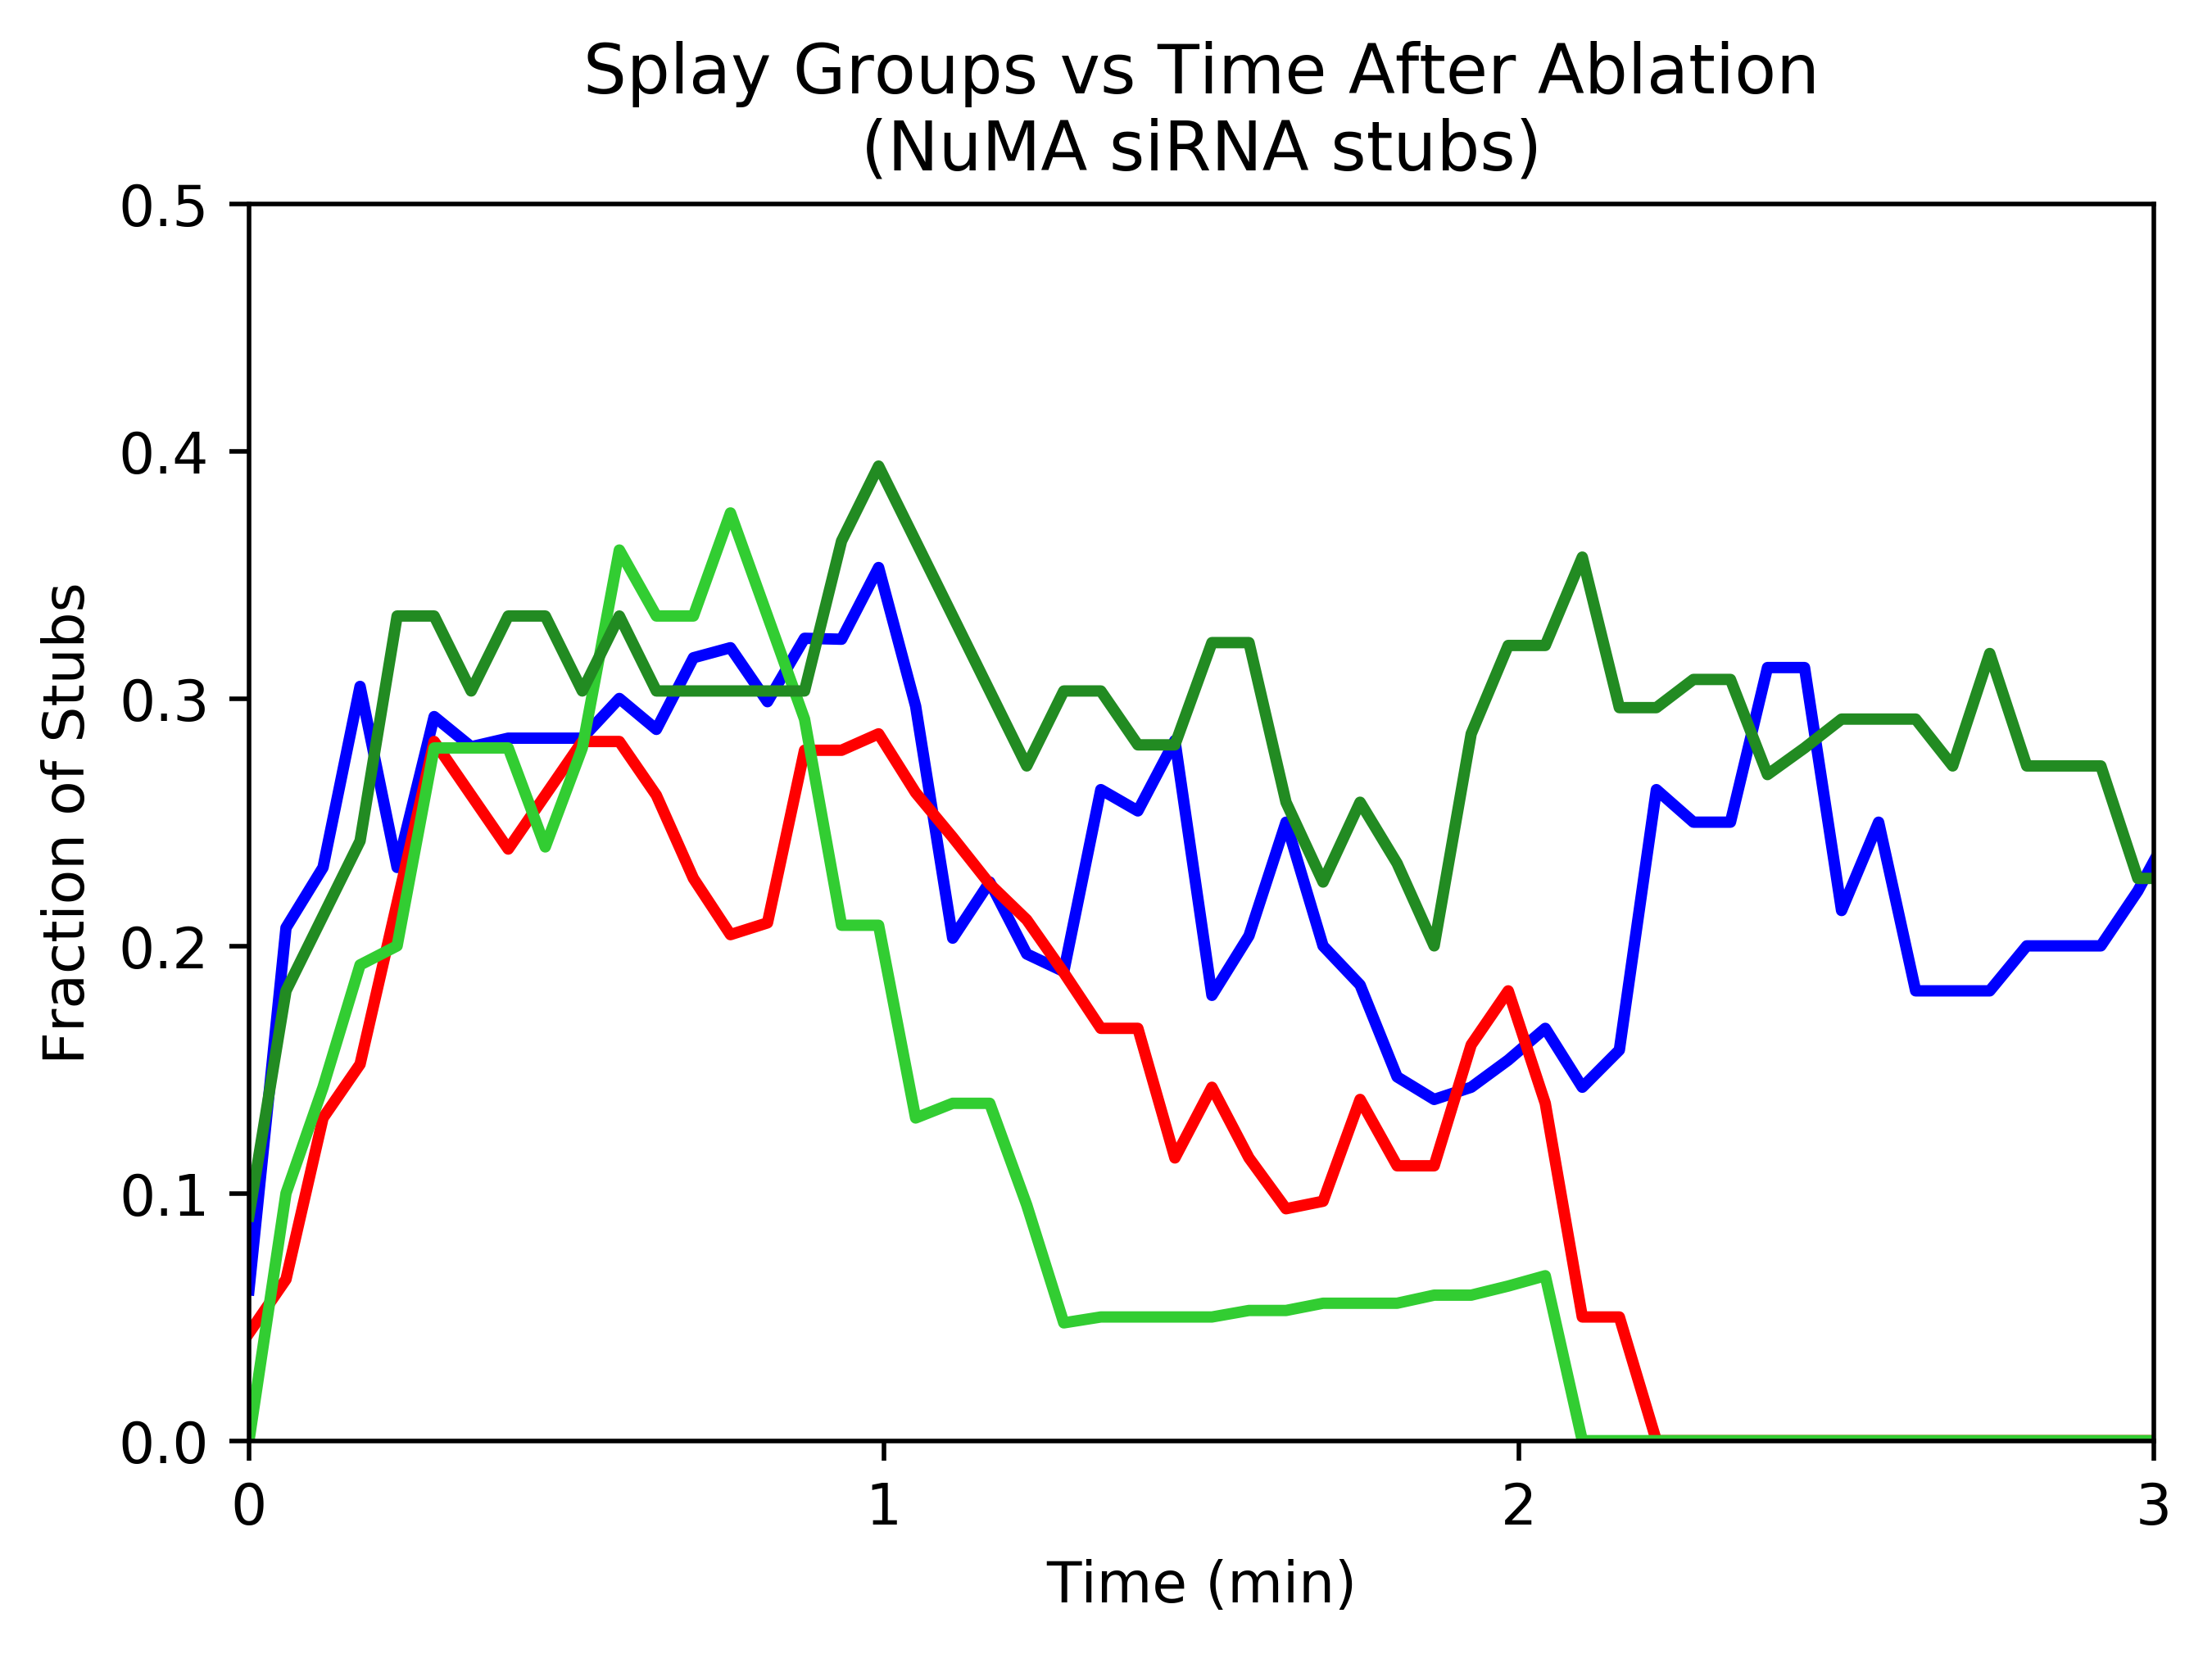

In [55]:
tSplayFracAll = []

for i in range(len(tTimesALL)):
    
    tSplayFracAll.append([])
    
    for j in range(len(tGroupsFsPlotALL[i][0])):
        tSplayFracAll[i].append(tGroupsFsPlotALL[i][0][j]-1)

plt.figure(dpi=500)
plt.plot(tTimesALL[0], tSplayFracAll[0], color=colors3[0], linewidth=2)
plt.plot(tTimesALL[1], tSplayFracAll[1], color=colors3[1], linewidth=2)
#plt.legend(handles=patches[0], title='Number of Groups')
plt.xlim(0,3)
plt.xticks([0,1,2,3])
plt.ylim(0,0.4)
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.title(titles[1])
plt.xlabel('Time (min)', size=10)
plt.ylabel('Fraction of Stubs', size=10)
#plt.savefig('Supplement_ControlNuMASplaying.eps', format='eps', dpi=1000)
plt.close()

plt.figure(dpi=500)
for i in range(len(tTimesALL)):
    #plt.plot(tTimesALL[i], tSplayFracAll[i], linewidth=2)
    plt.plot(tTimesALL[i], tSplayFracAll[i], color=colors3[i], linewidth=2)
#plt.legend(handles=patches[0], title='Number of Groups')
plt.xlim(0,3)
plt.xticks([0,1,2,3])
#plt.xlim(0,5)
#plt.xticks([0,1,2,3,4,5])
plt.ylim(0,0.5)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.title(titles[1])
plt.xlabel('Time (min)', size=10)
plt.ylabel('Fraction of Stubs', size=10)
plt.savefig('Supplement_SplayingProb.eps', format='eps', dpi=1000)
#plt.close()

In [10]:
for i in range(len(tWTgroupsFsPlotALL)):
    print(tWTgroupsFsPlotALL[i])
    print('')

[1.0609756097560976, 1.2073170731707317, 1.2317073170731707, 1.3048780487804879, 1.2317073170731707, 1.2926829268292683, 1.2804878048780488, 1.2839506172839505, 1.2839506172839505, 1.2839506172839505, 1.3, 1.2875, 1.3164556962025316, 1.3205128205128205, 1.2987012987012987, 1.3243243243243243, 1.323943661971831, 1.3529411764705883, 1.296875, 1.203125, 1.2258064516129032, 1.1967213114754098, 1.1896551724137931, 1.263157894736842, 1.2545454545454544, 1.2830188679245285, 1.1800000000000002, 1.2040816326530612, 1.25, 1.2, 1.1842105263157894, 1.1470588235294117, 1.1379310344827587, 1.1428571428571428, 1.1538461538461537, 1.1666666666666665, 1.1428571428571428, 1.1578947368421053, 1.263157894736842, 1.25, 1.25, 1.3125, 1.3125, 1.2142857142857144, 1.25, 1.1818181818181817, 1.1818181818181817, 1.1818181818181817, 1.2, 1.2, 1.2, 1.2222222222222223, 1.25, 1.25, 1.25, 1.25, 1.2857142857142856, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,